<a href="https://colab.research.google.com/github/BrainConnection/Quantum_Algorithm/blob/main/6.%205Q%20TFIM%20VQNHE%20CNN%20QEM%20ZZ%20Crosstalk%200%201%202%203%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-algorithms
!pip install qiskit-aer

!pip install scipy
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.0/318.0 kB 11.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     

In [ ]:
from functools import cache

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum",
                                  token="067e5c82606f0a1157dd554e2087d6b7a9b823dbaa4ad47b95c3337eab2e6cd9361719cc0470f4a98d1631b73b264a82577012a0b8ff32963d5964e6cc12c525",
                                  set_as_default=True,
                                  overwrite=True)

service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")

# Hamiltonian Diagonalization

$$ H = Σ Z_j Z_{j+1} - Σ X_j  $$

1D 5 Qubit System

In [ ]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)
hamiltonian_matrix = hamiltonian.to_matrix()

eigenvalue, eigenvector = np.linalg.eig(hamiltonian_matrix)

lowest_energy = np.min(eigenvalue)

np.real(lowest_energy)

-6.026674183332294

# 7. CNN Estimation - ZZ Crosstalk (CUSCO 0 1 2 3 4)

## ZZ Crosstalk, Shots = 10000

CUSCO 0 1 2 3 4

J = 1MHz

1. Optimize Parameters in PQC

2. Fix Parameters in PQC and Connect Neural Net Layer, Optimize Parameters in Neural Net

### Ansatz, Hamiltonian, Sampler & Estimator Setting

CUSCO 0 1 2 3 4

J = 1MHz

In [ ]:
# Qubit Number 0,1,2,3,4

J = 0.001                                                   # Unit : GHz
freq = [5.015, 4.956, 4.807, 5.232, 5.138]                  # Unit : GHz
anharm = [-0.30739, -0.30775, -0.31038, -0.30373, -0.3054]  # Unit : GHz

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.circuit.library import RZZGate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# ZZ Crosstalk Frequency

H1 = np.array([[freq[0], J], [J, freq[1]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_01 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[1], J], [J, freq[2]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_12 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[2], J], [J, freq[3]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_23 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[3], J], [J, freq[4]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_34 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2

[5.01501694 4.95598306]
[9.72260195 9.9710135  9.60424455]
1.350452146908765e-05
[4.95600671 4.80699329]
[9.6042374  9.76301695 9.30361565]
1.6950613608734955e-05
[4.80699765 5.23200235]
[ 9.30361728 10.03898623 10.16028649]
-1.3770519234235223e-05
[5.23201064 5.13798936]
[10.16026046 10.37001454  9.97059499]
1.4542737942768724e-05


In [ ]:
crosstalk_freq_01, crosstalk_freq_12, crosstalk_freq_23, crosstalk_freq_34

(6.752260734543825e-06,
 8.475306804367477e-06,
 -6.885259617117612e-06,
 7.271368971384362e-06)

In [ ]:
gate_01 = 460
gate_12 = 460
gate_23 = 940
gate_34 = 460

gate_single = 40

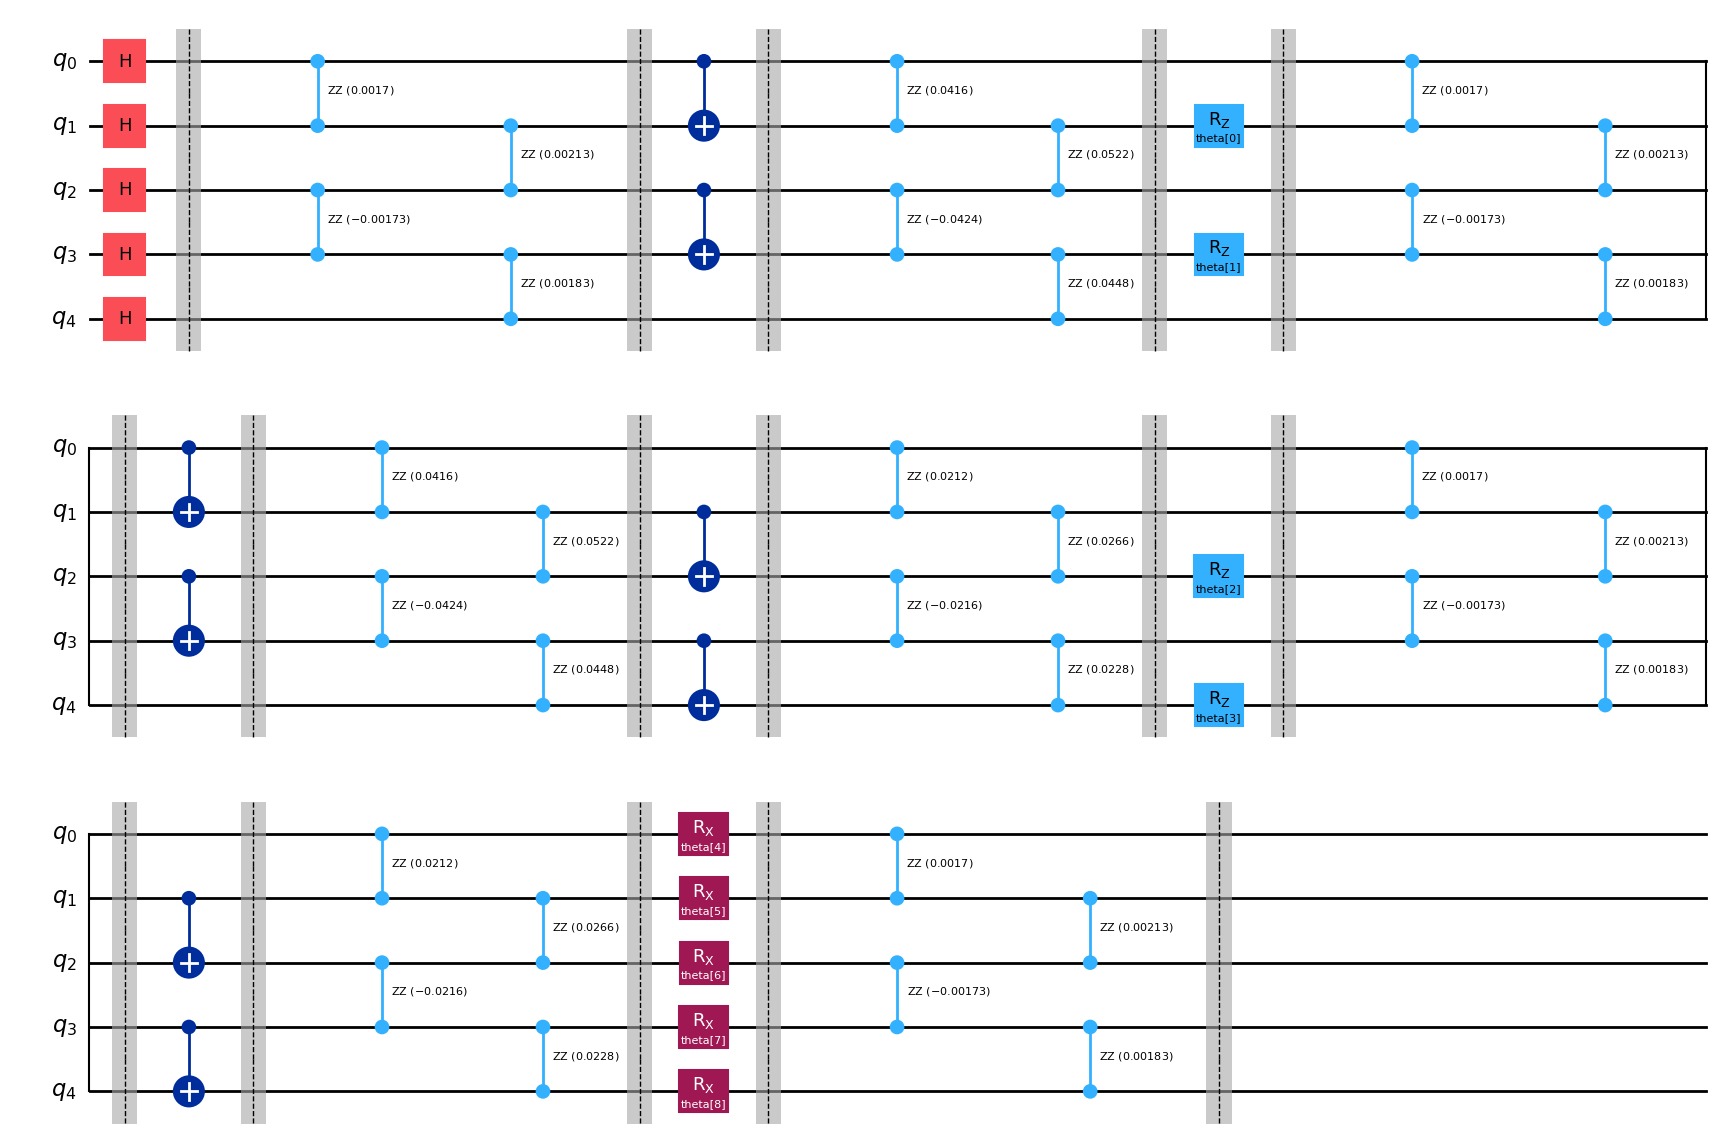

In [ ]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)

ansatz.h(range(0,5))
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatz.barrier()


ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatz.barrier()


ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatz.barrier()


ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.draw("mpl")

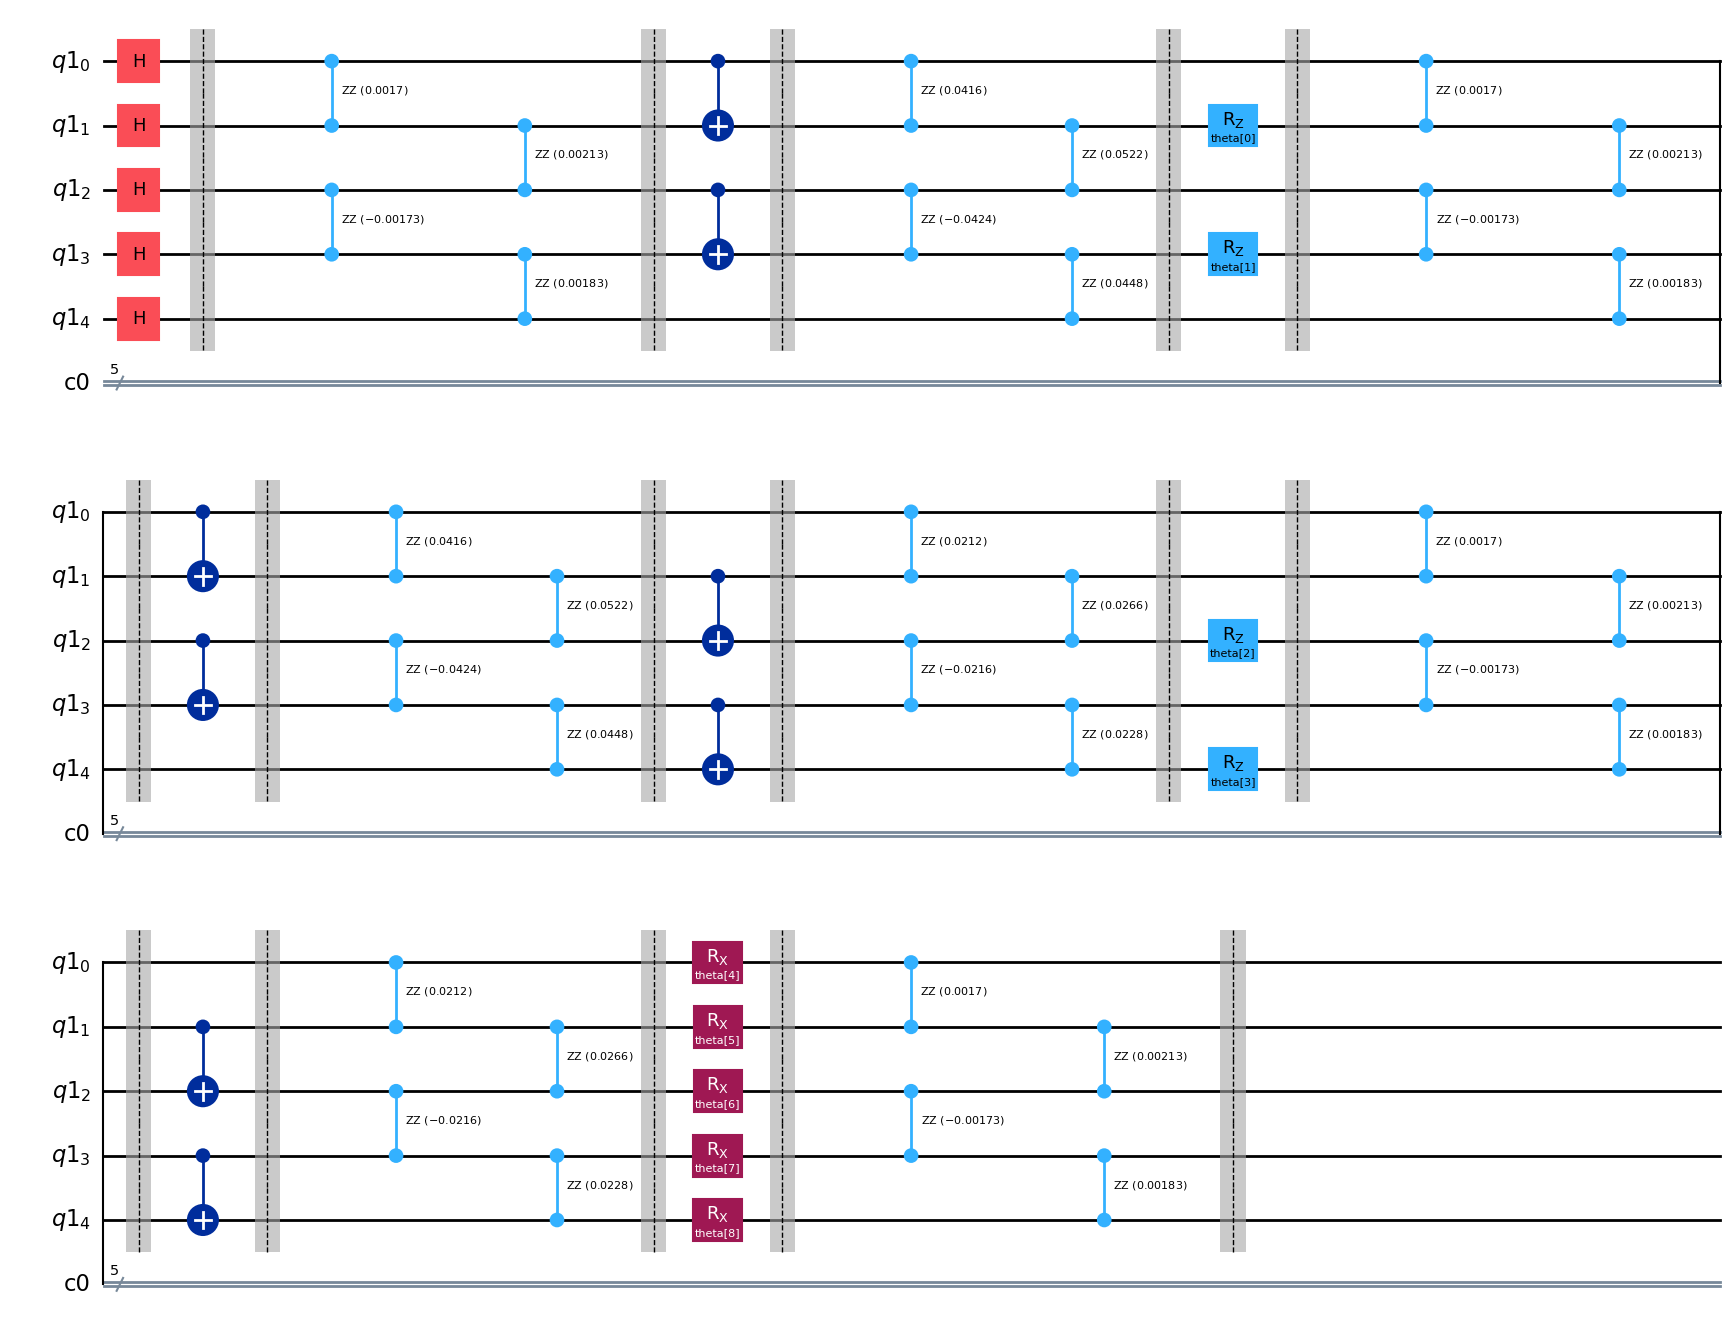

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

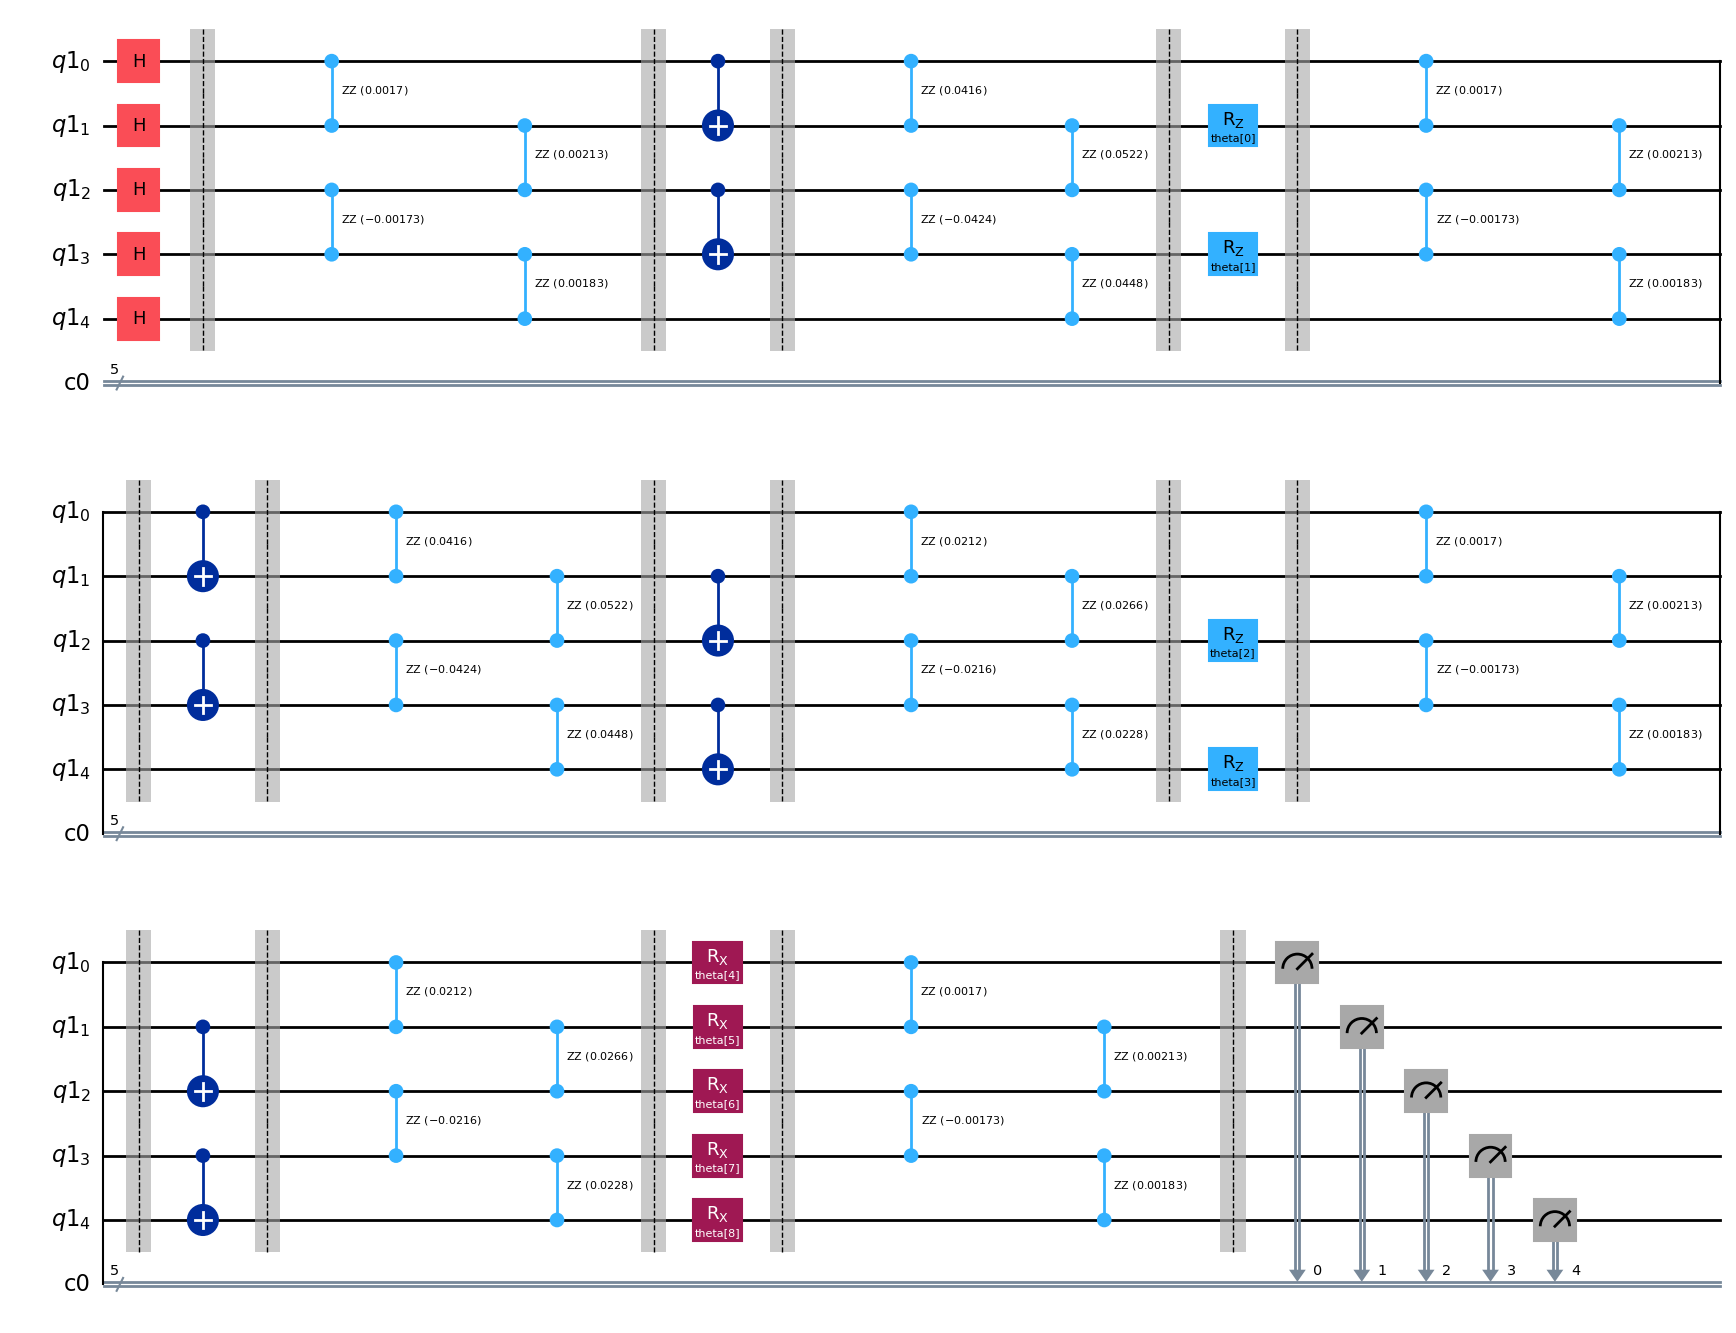

In [ ]:
# Ansatz for VQNHE ZZ Measurement

ansatz_zz = ansatzo

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

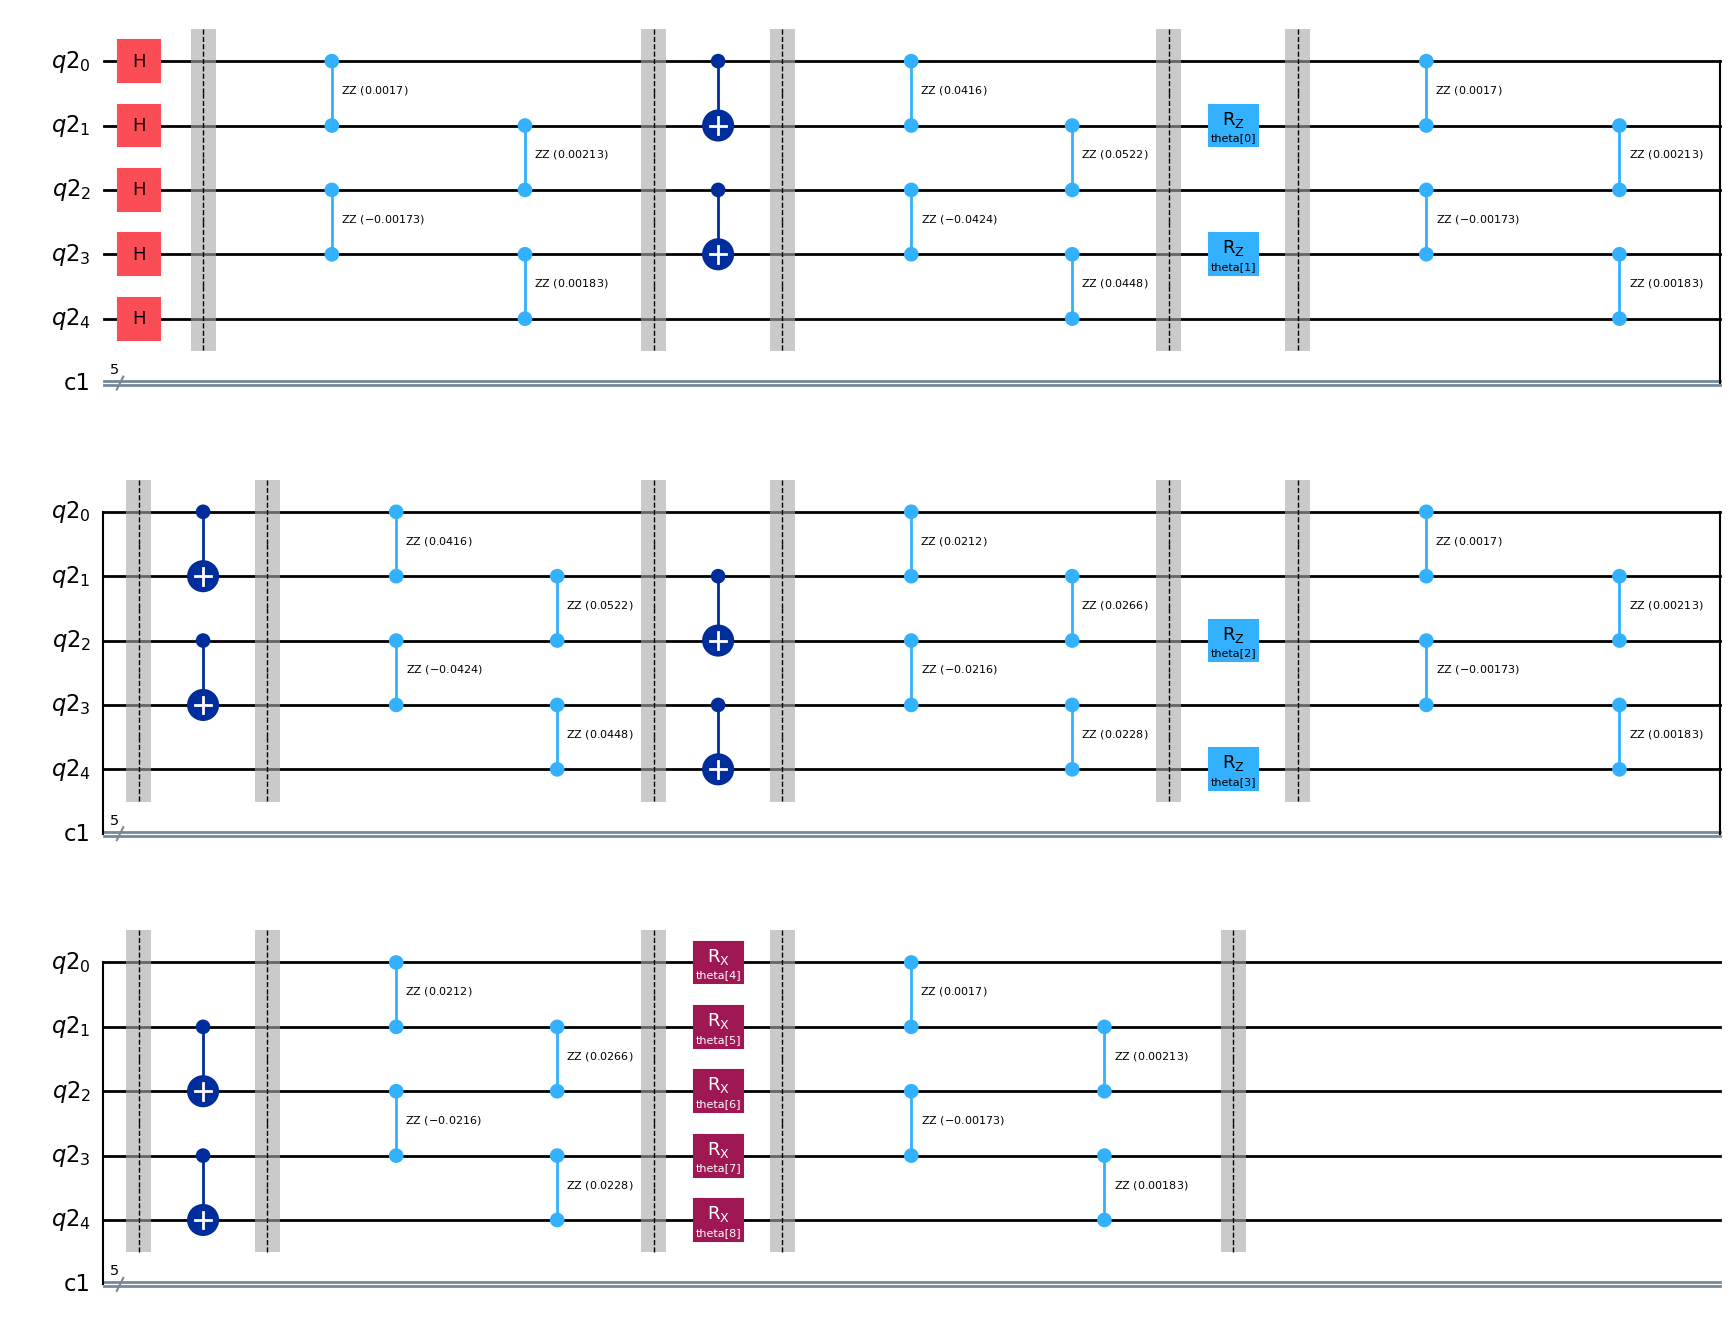

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

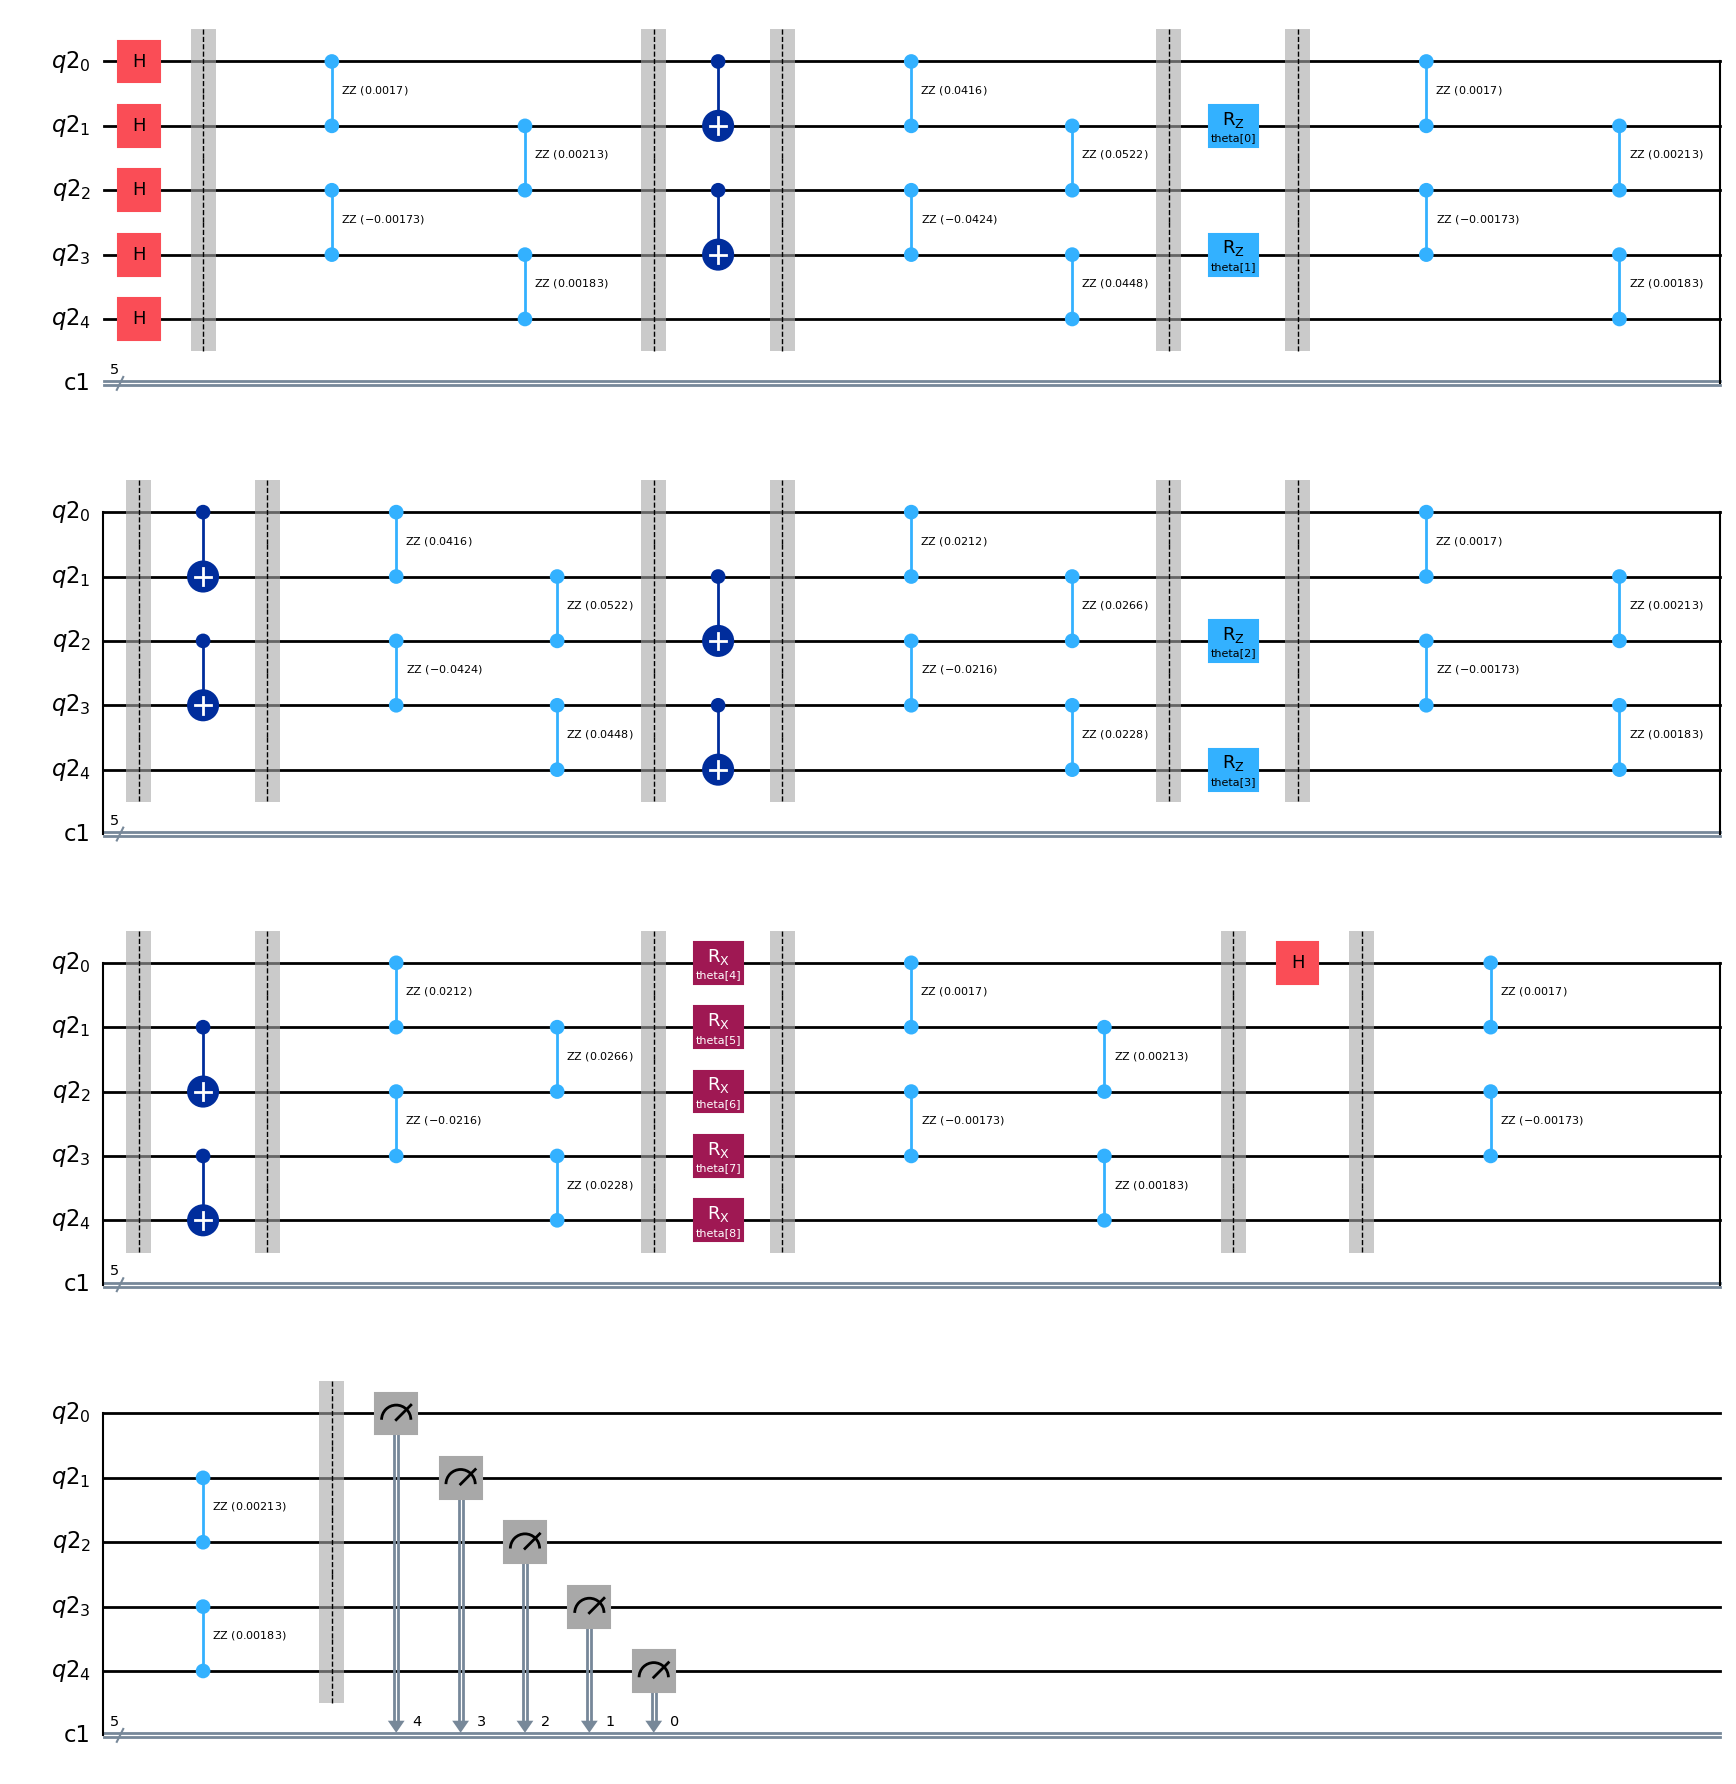

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = ansatzo

ansatz_x0.h(0)
ansatz_x0.barrier()

ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

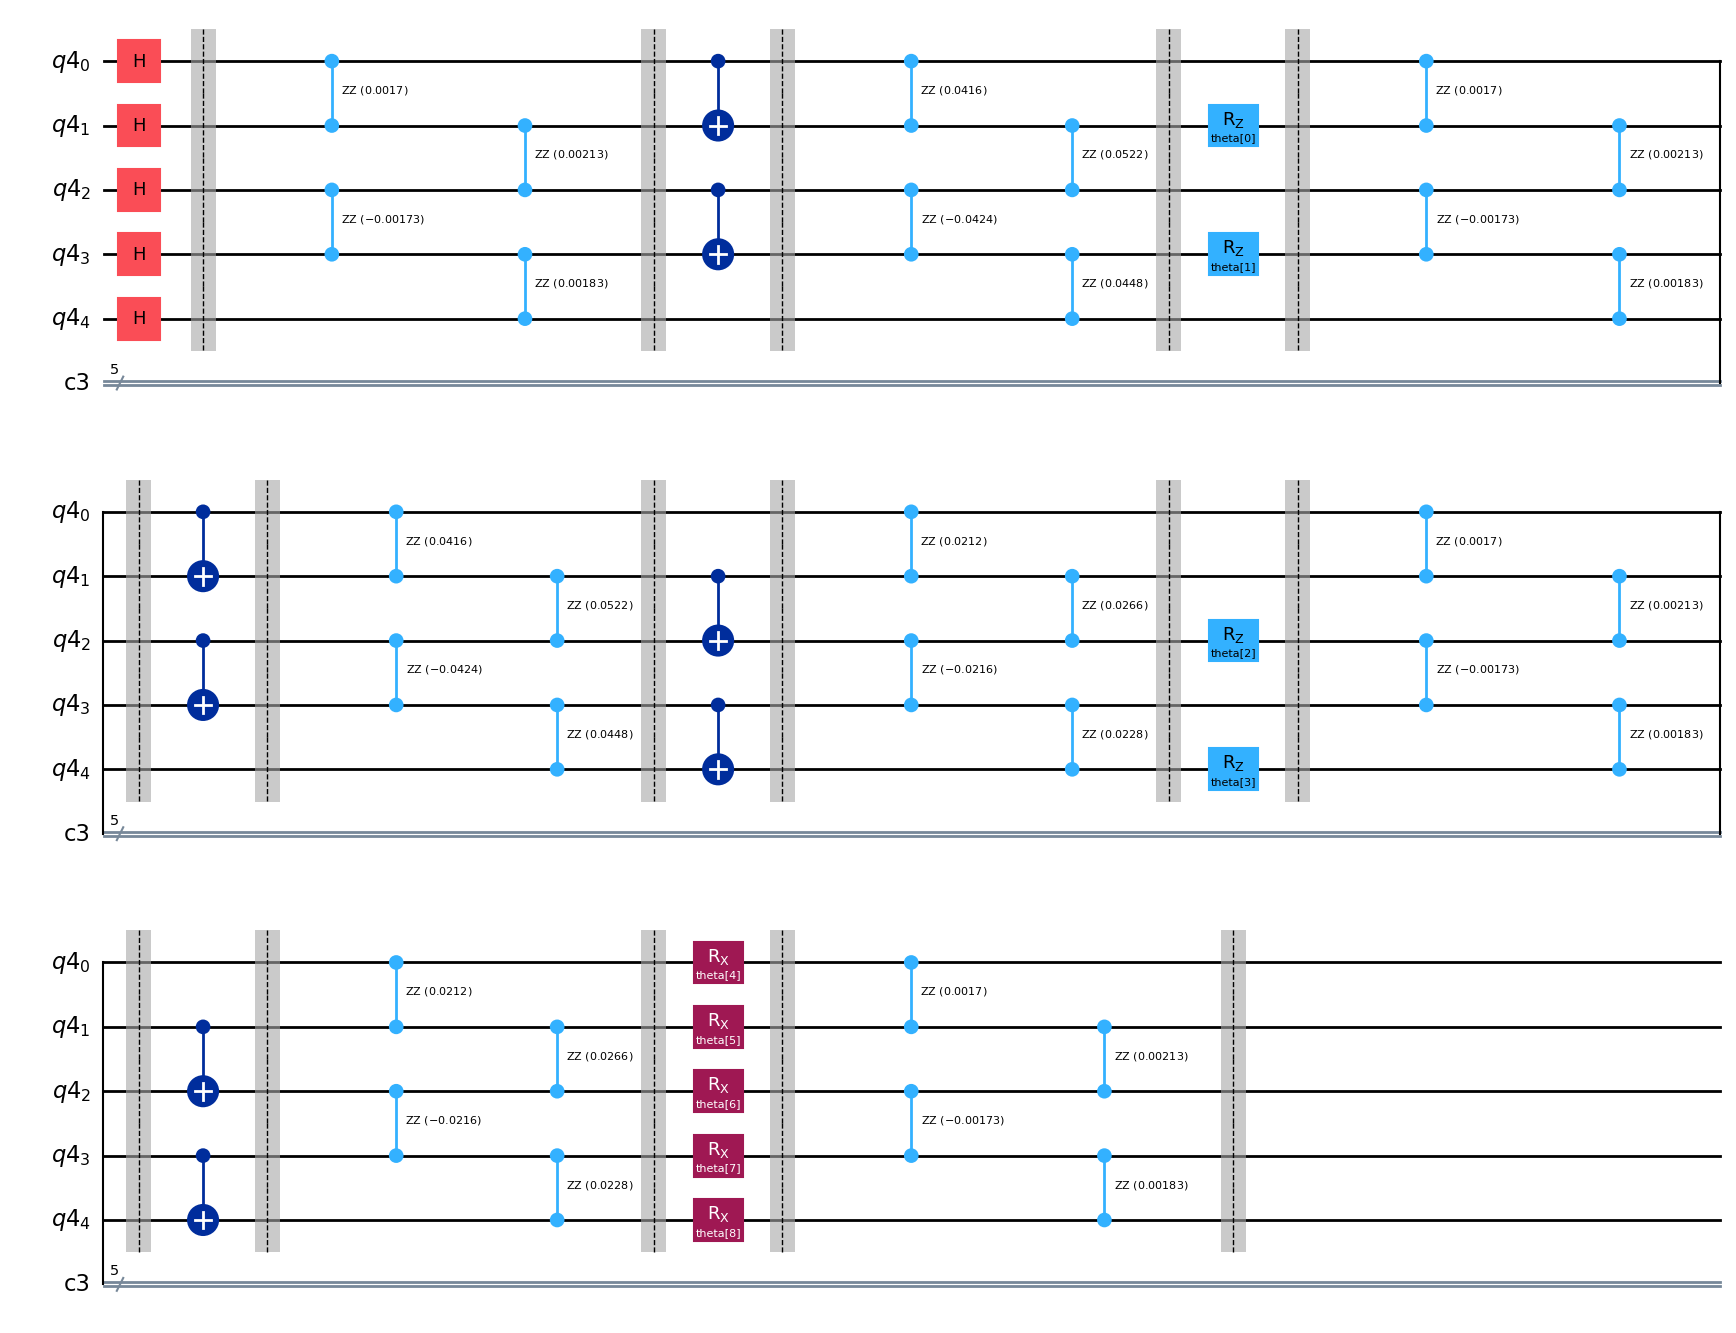

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

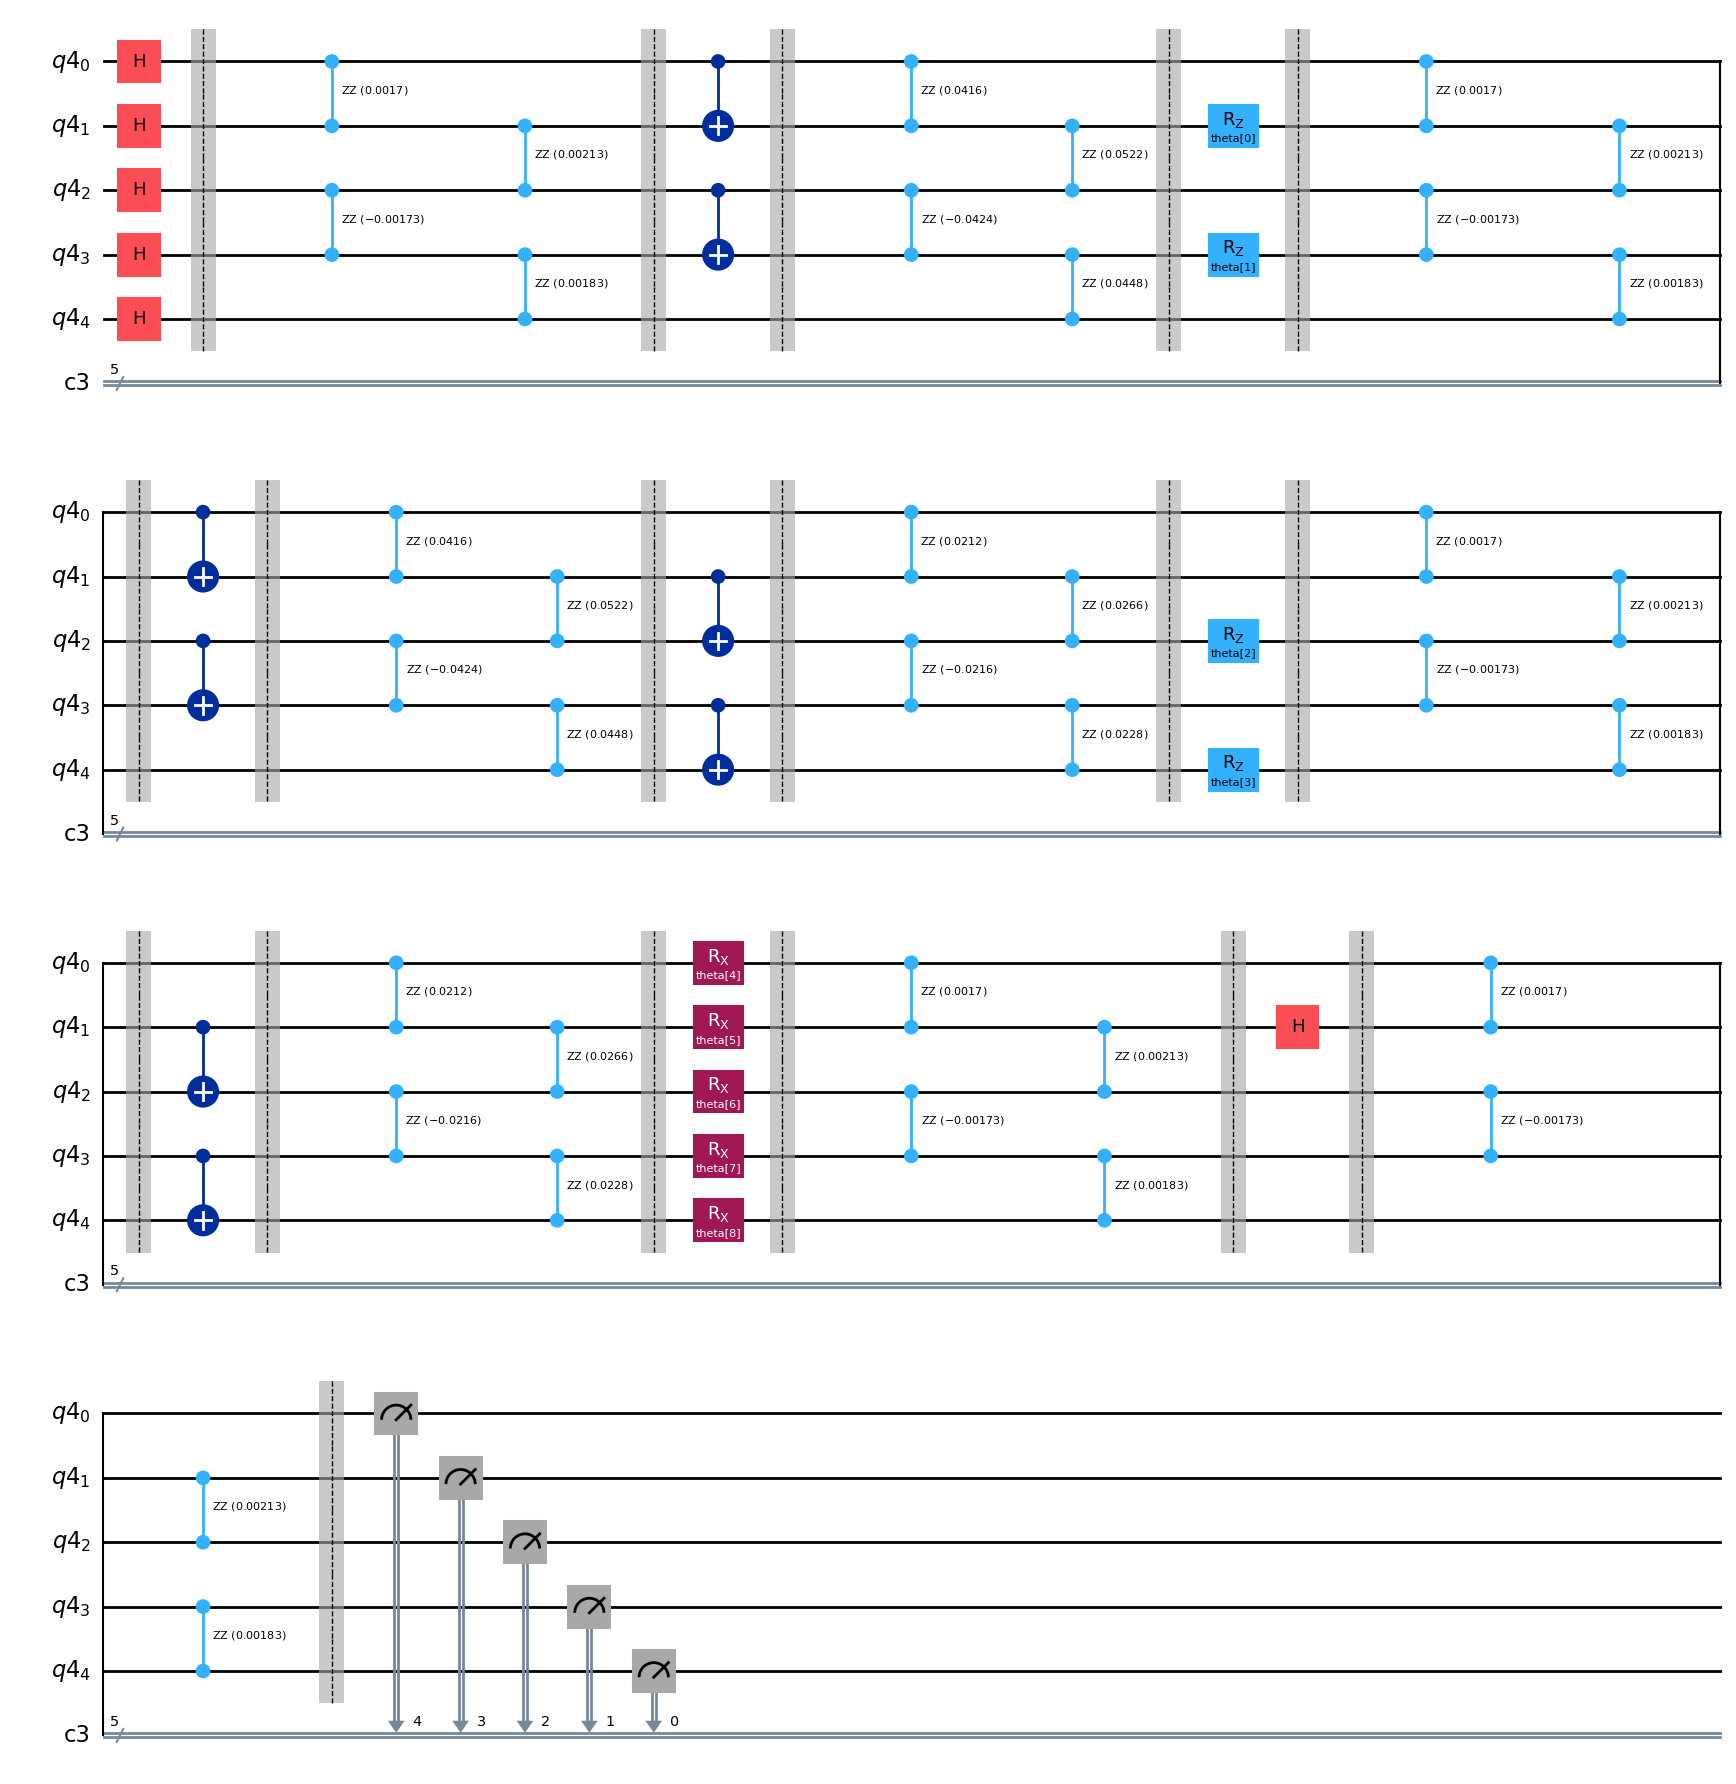

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = ansatzo

ansatz_x1.h(1)
ansatz_x1.barrier()

ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

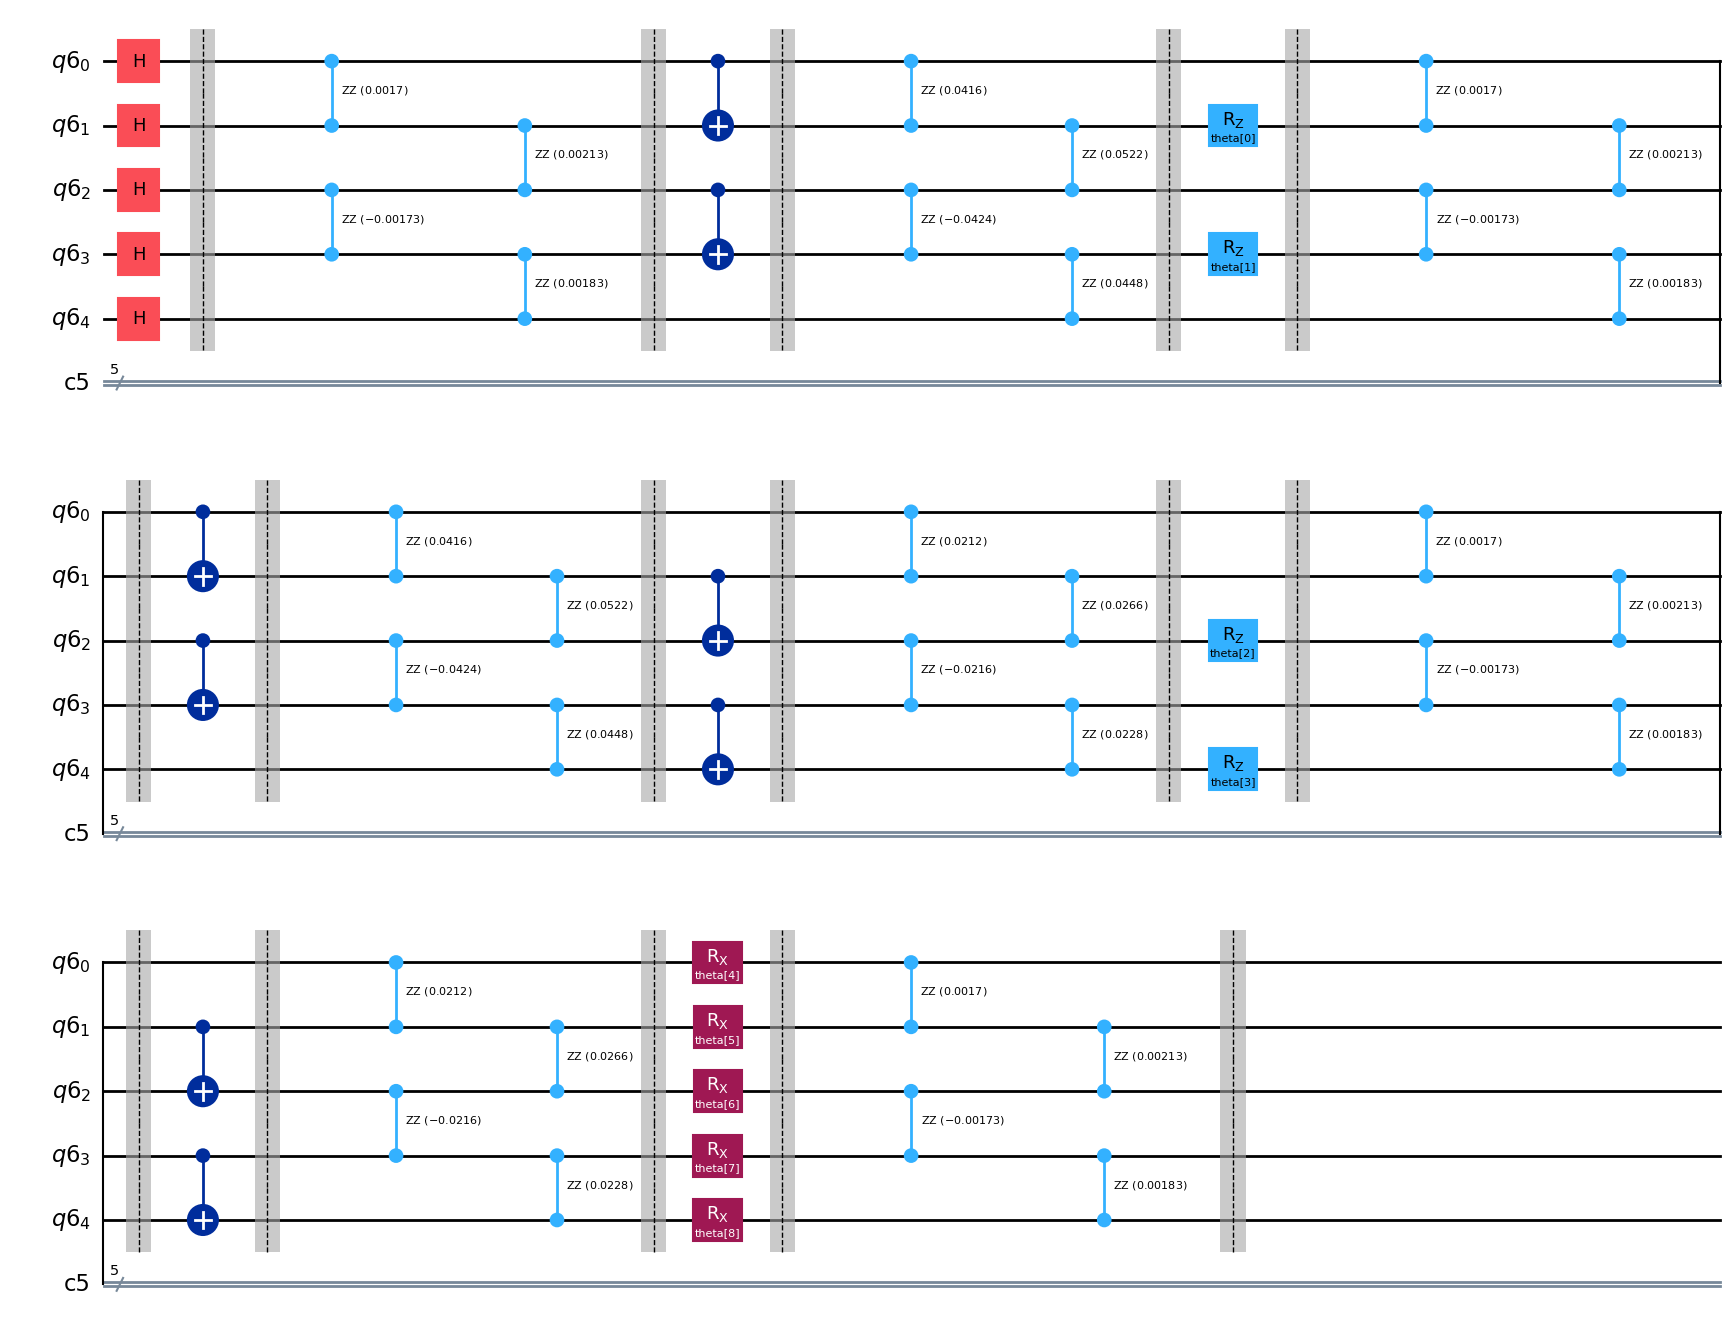

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

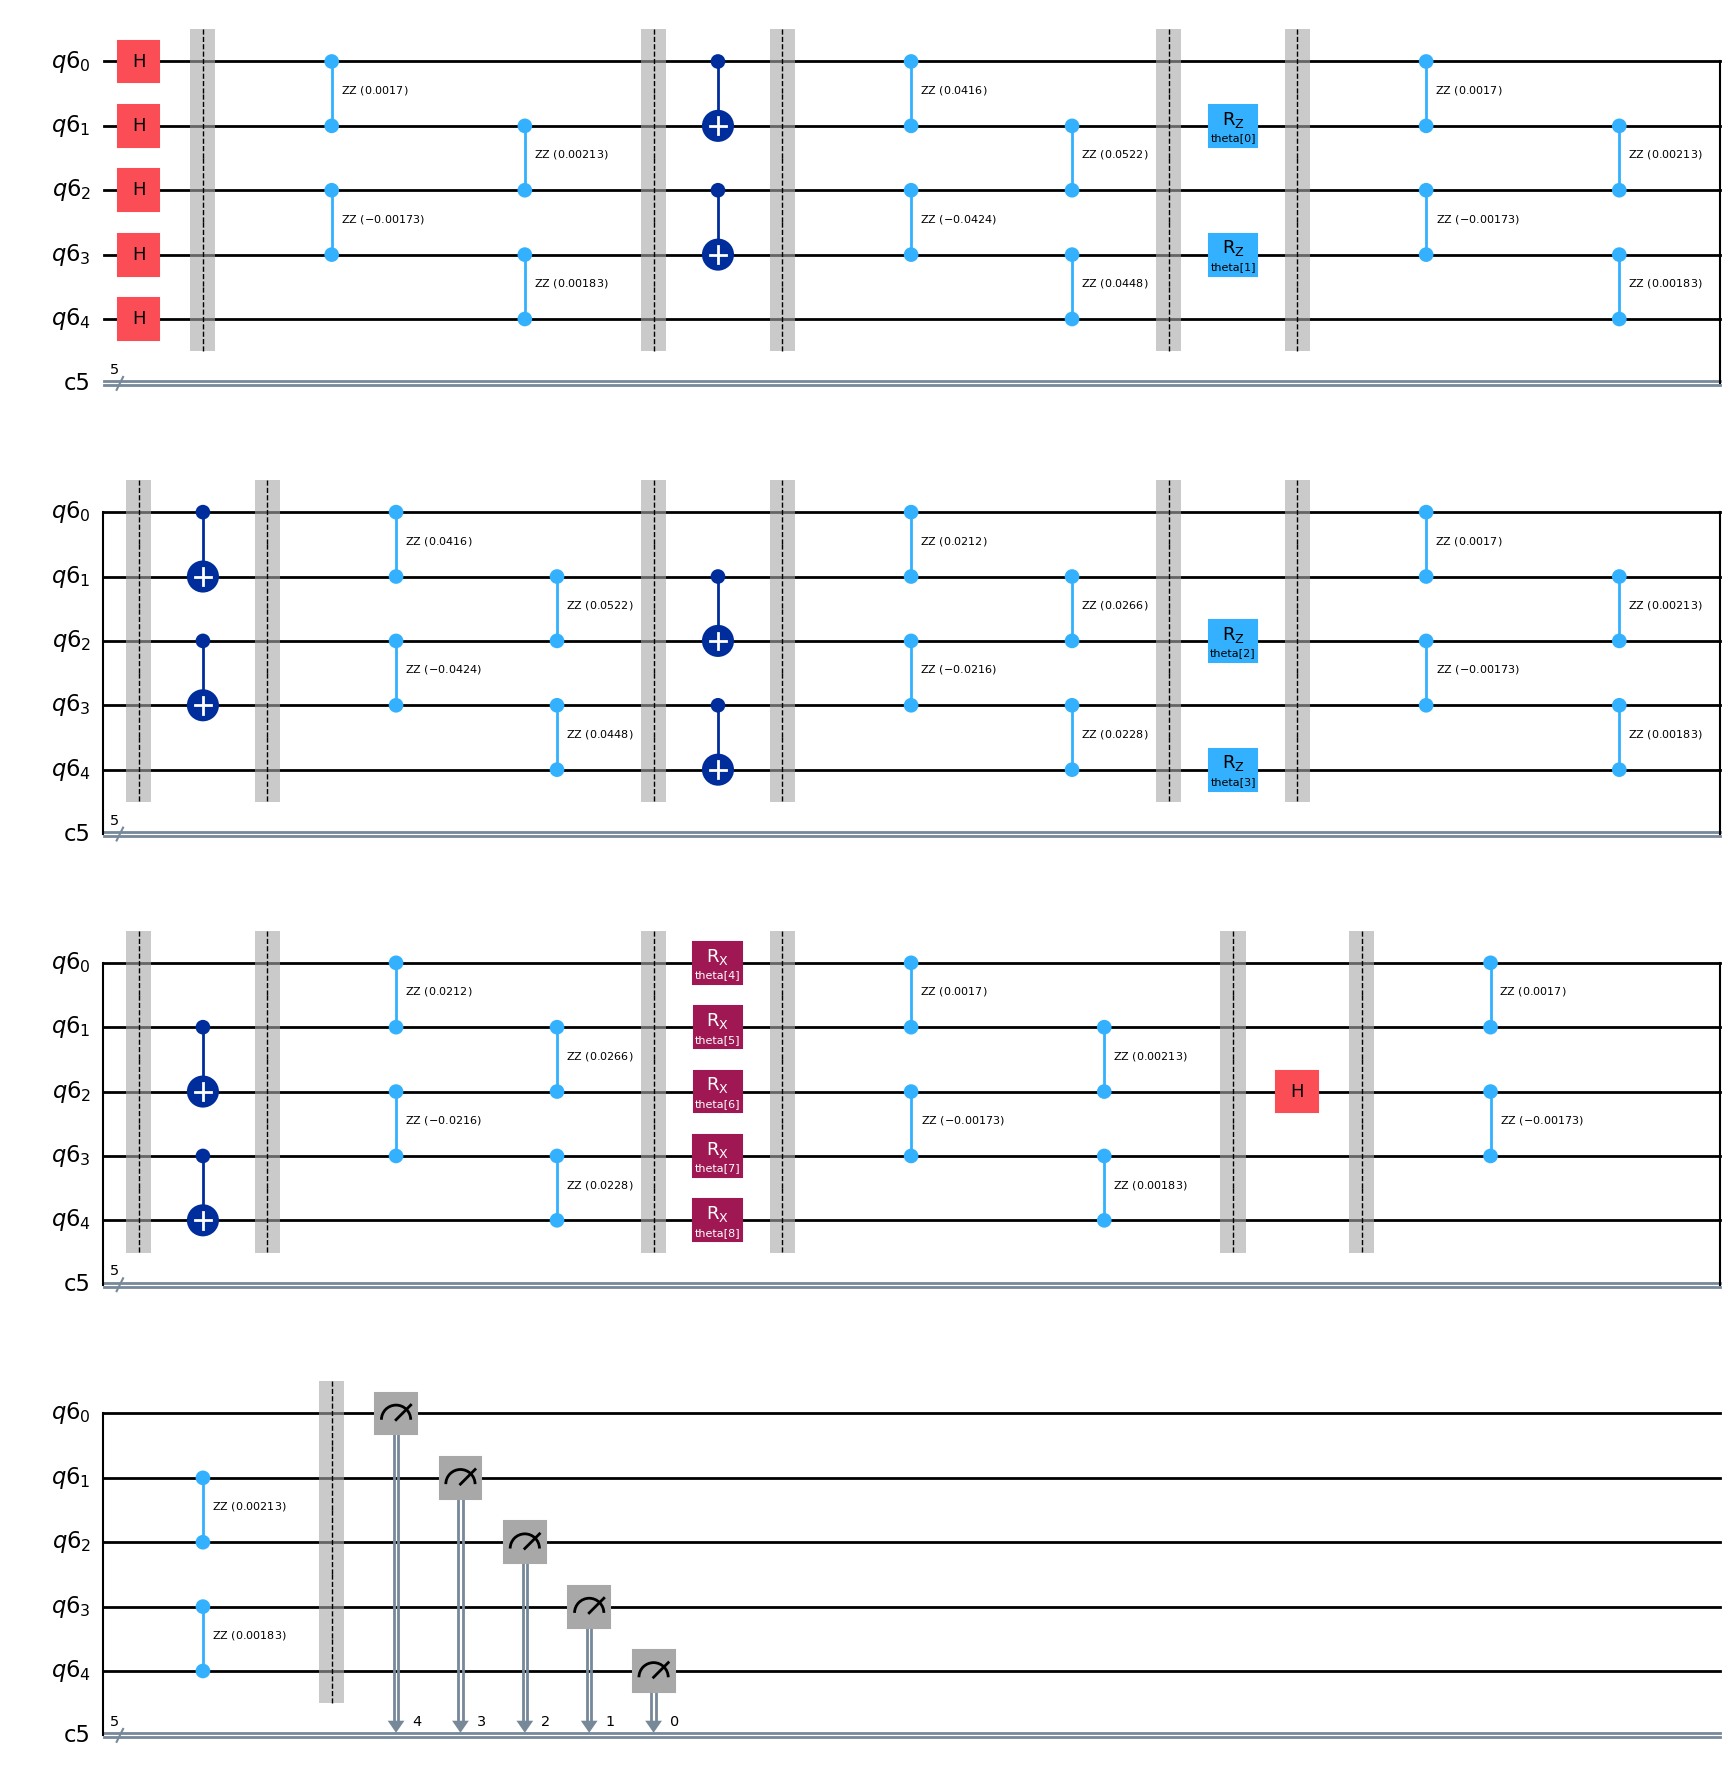

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = ansatzo

ansatz_x2.h(2)
ansatz_x2.barrier()

ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

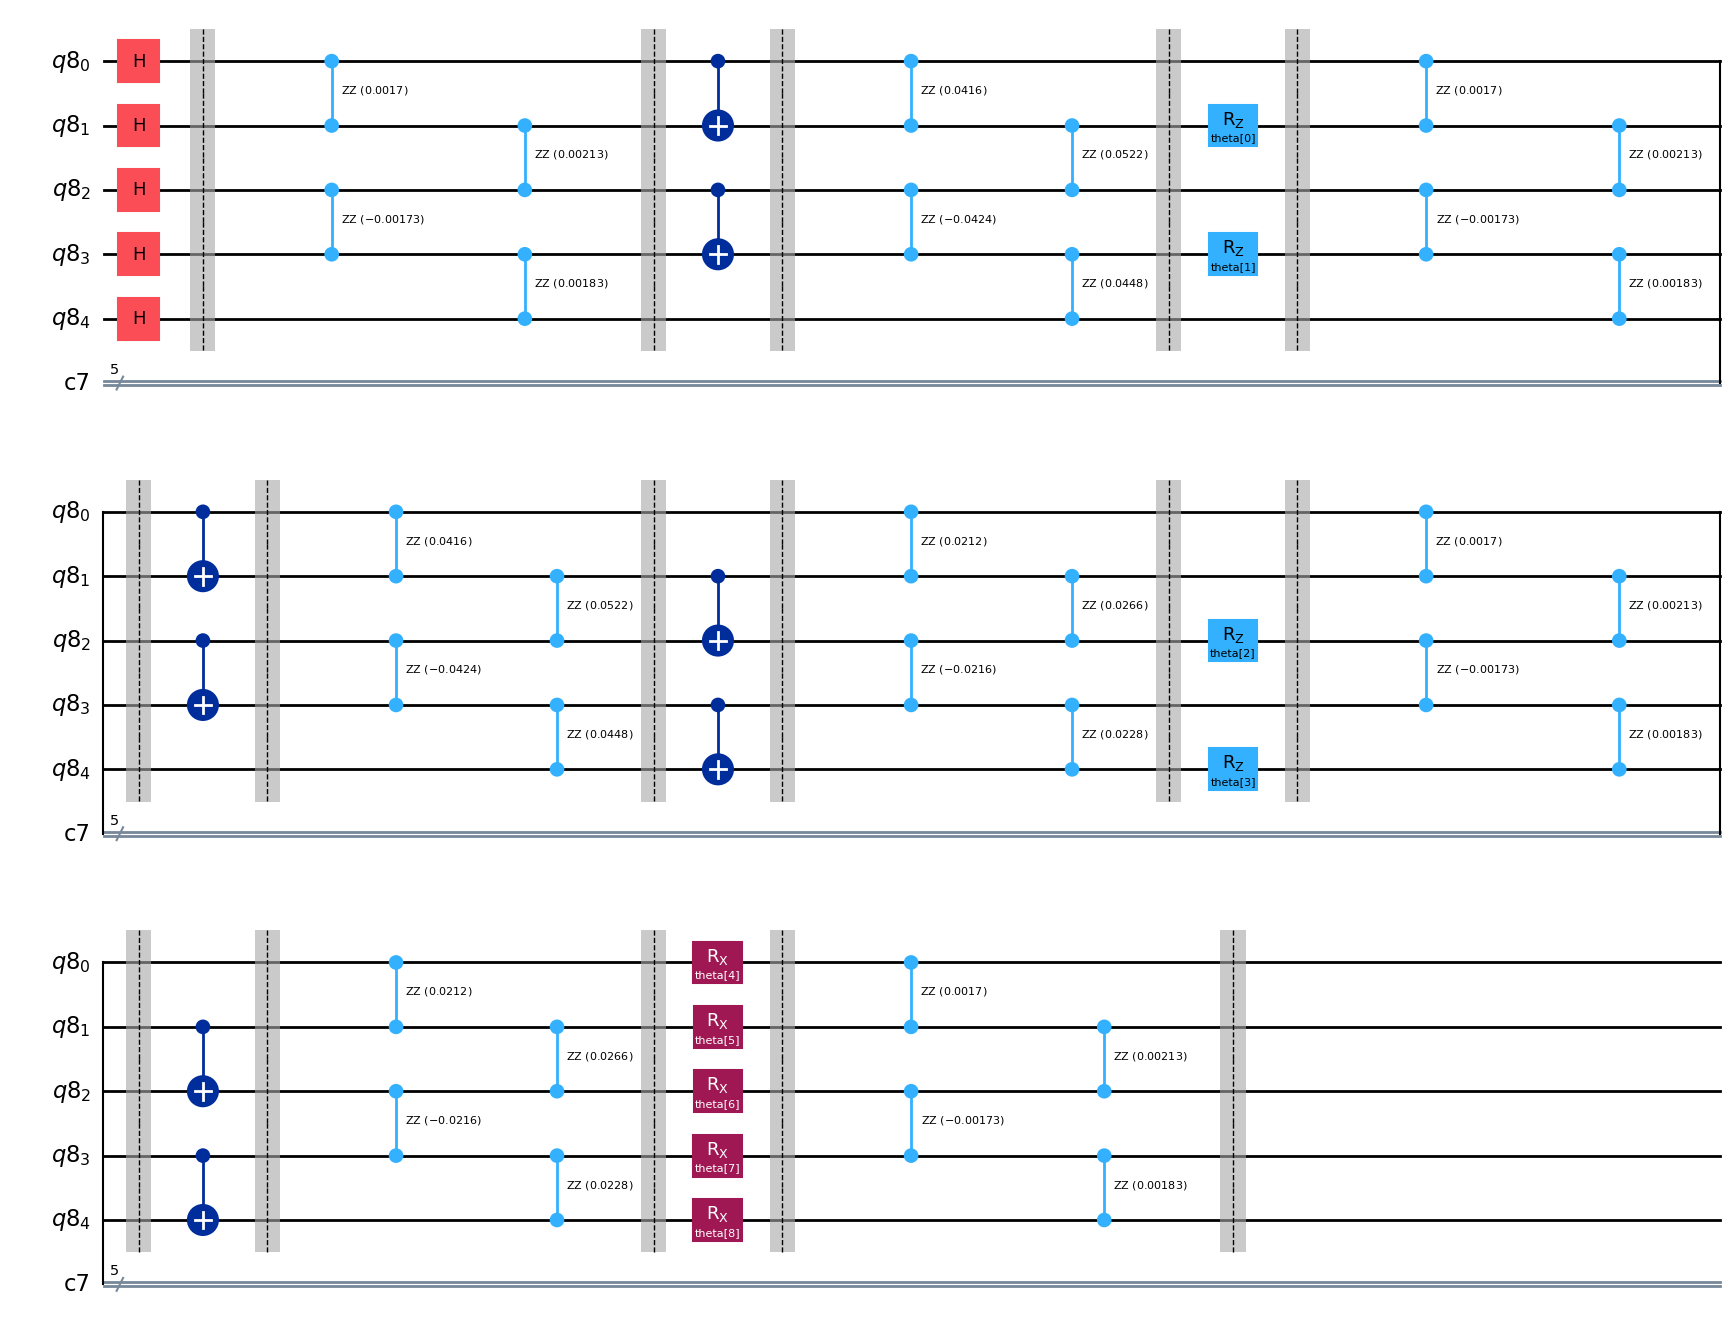

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

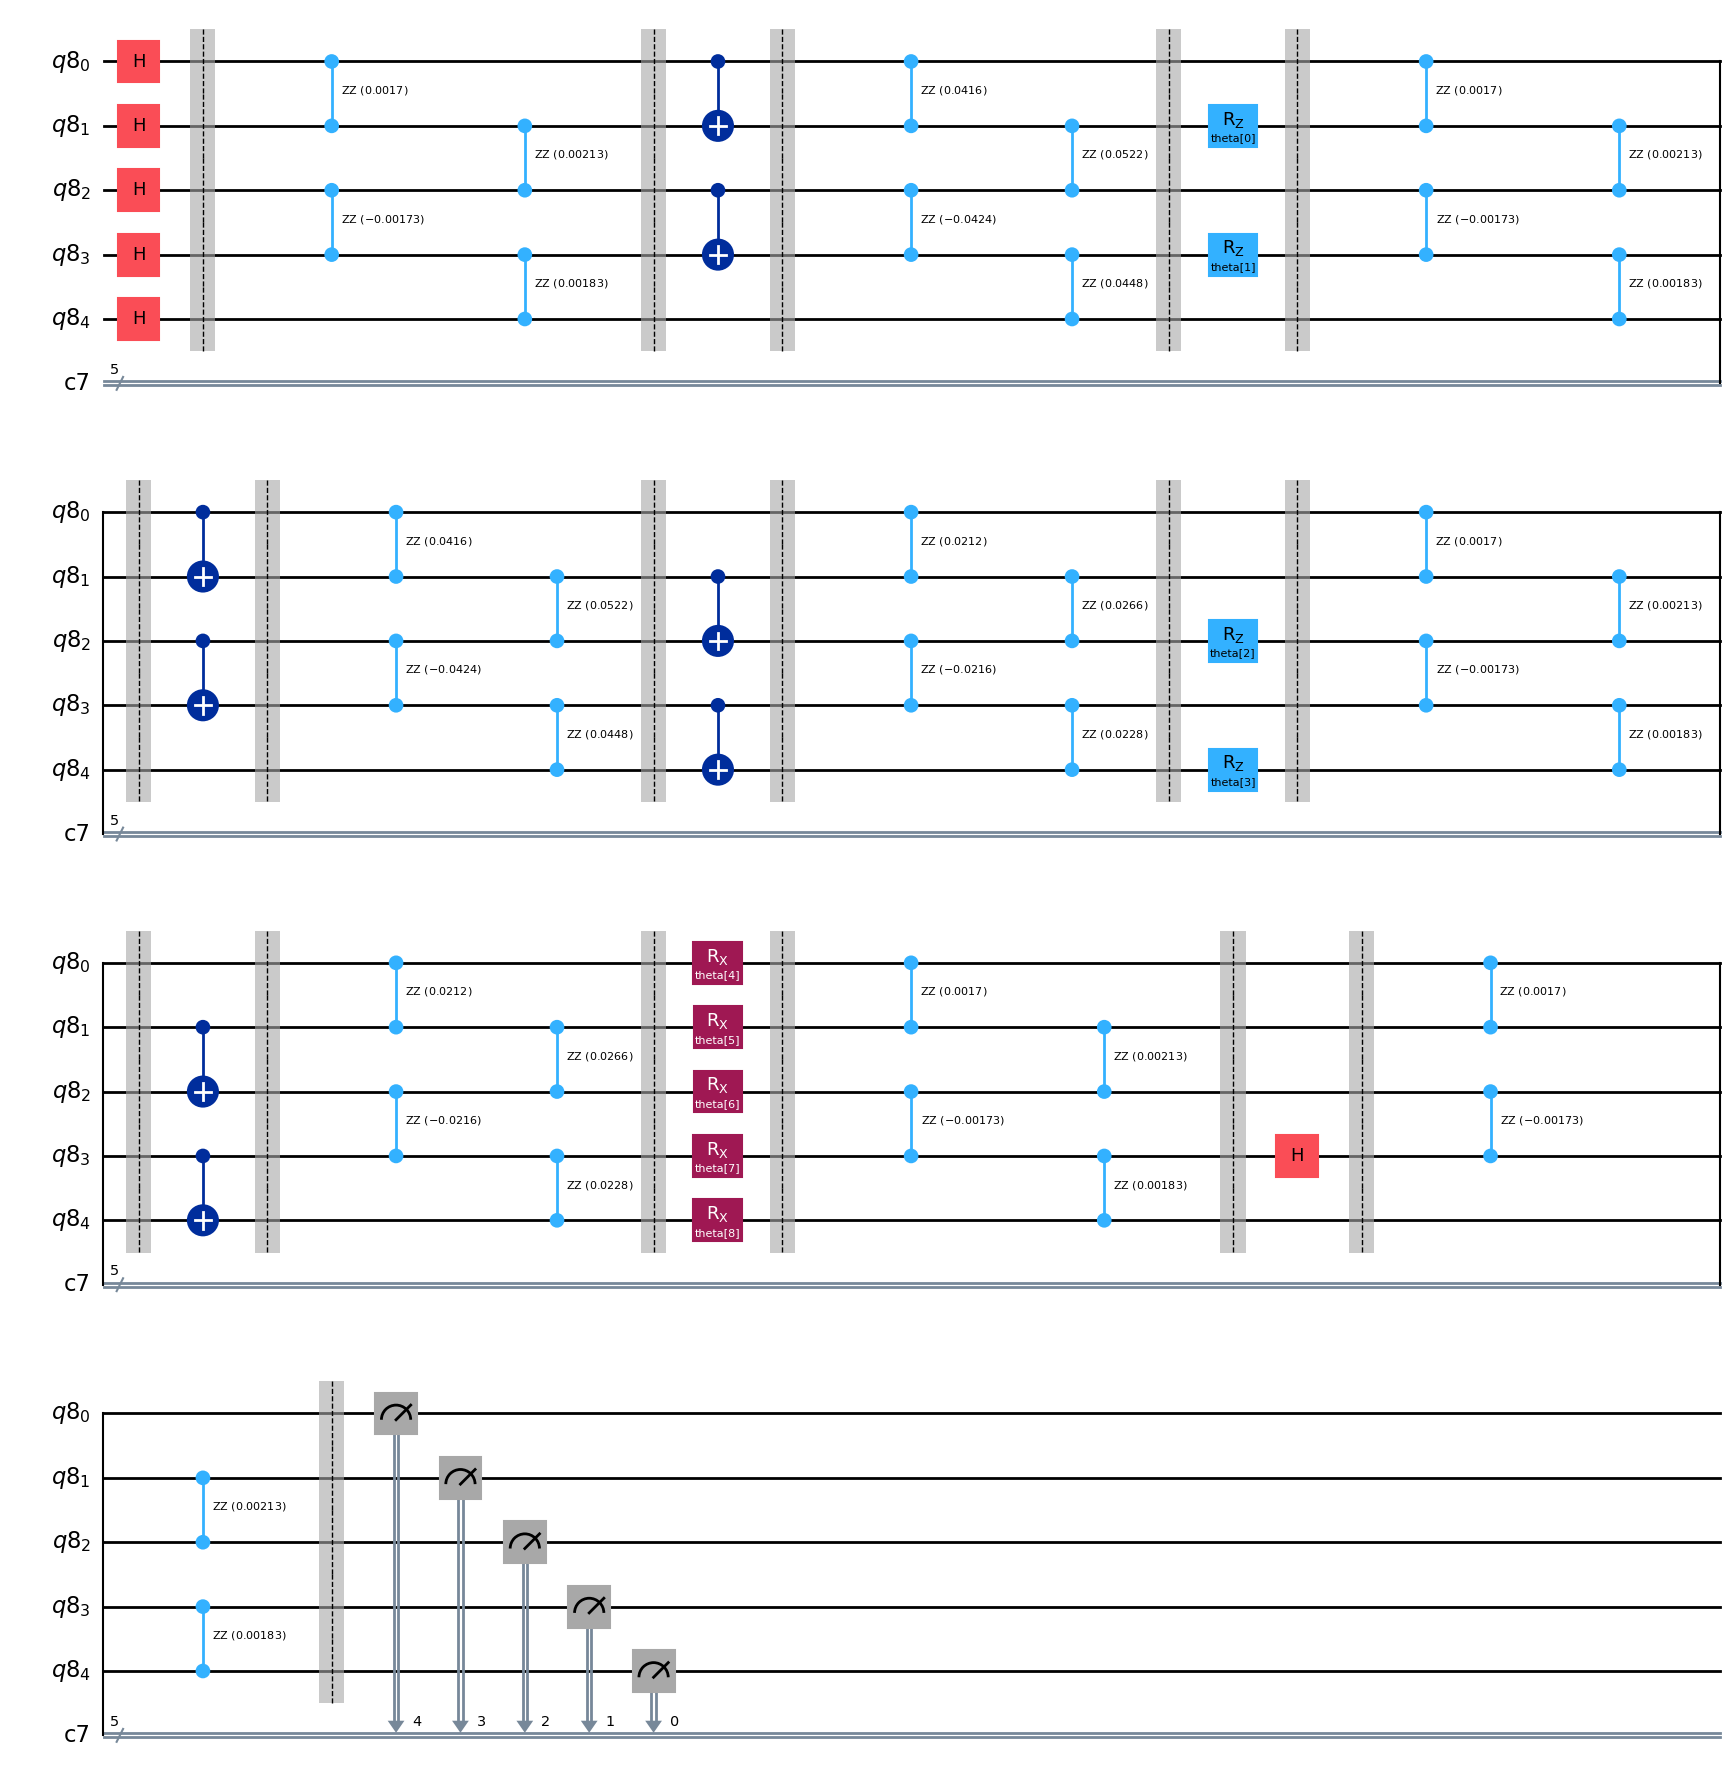

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = ansatzo

ansatz_x3.h(3)
ansatz_x3.barrier()

ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

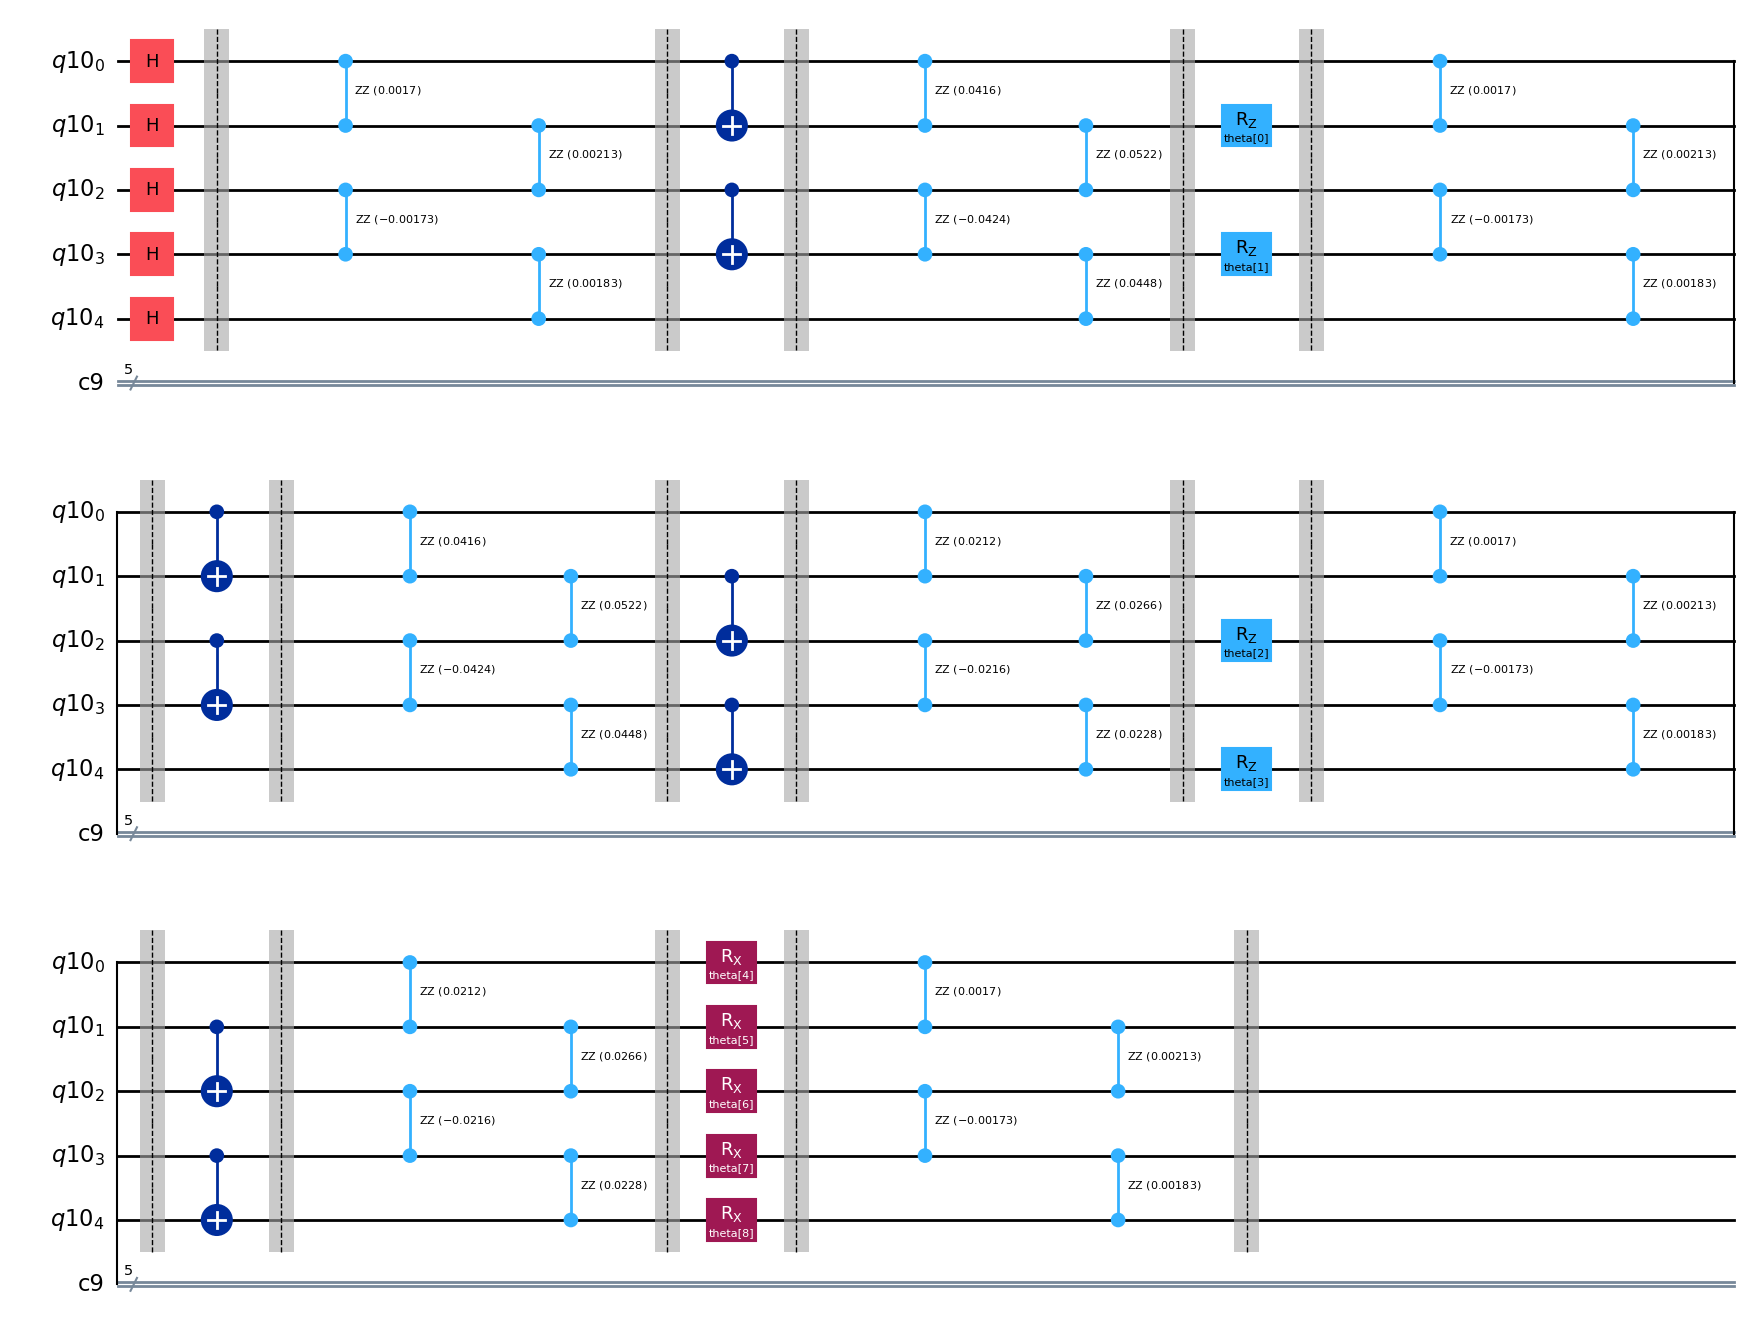

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

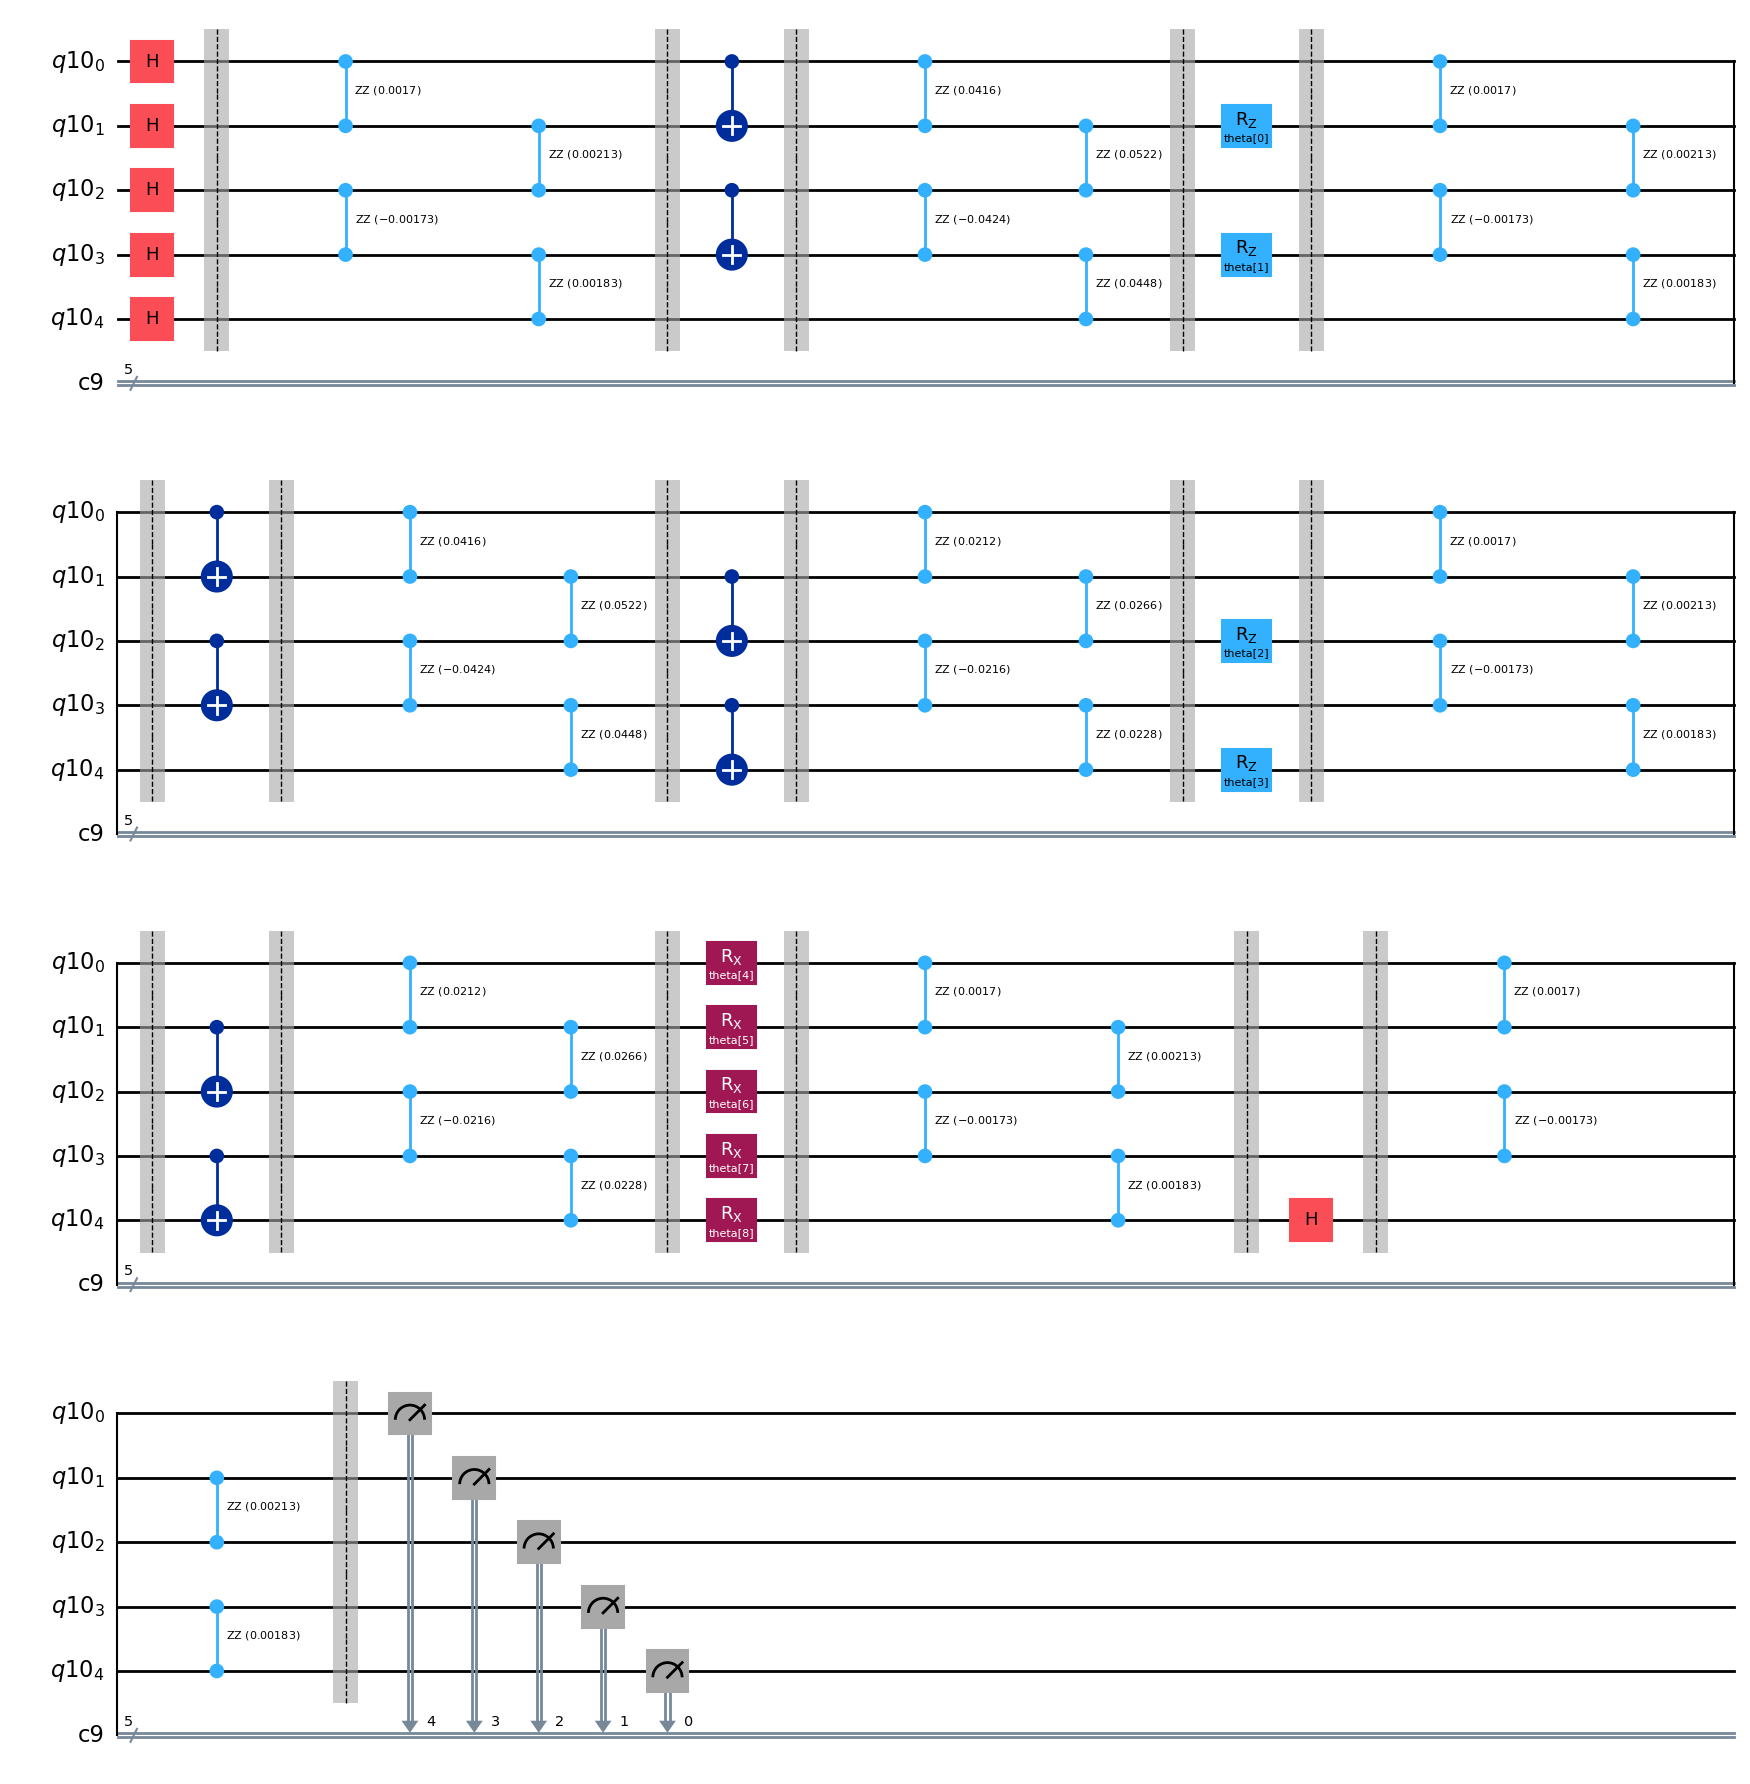

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = ansatzo

ansatz_x4.h(4)
ansatz_x4.barrier()

ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

### Cost Function for VQE & VQNHE

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))


# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:5]
  c = parameter[5]

  FC1 = FC1.reshape(1,5)


  a1 = np.matmul(FC1, x)
  y = output_activate(c, a1)

  return y[0]

In [ ]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=10000, seed=1).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [ ]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval


def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [ ]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)
    callback_dict["cost_history"].append(current_cost)

  return callback

### VQE

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=6), pqc))
    if cost_func_vqnhe(np.zeros(shape=6), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=6), pqc)
      optimized_pqc = pqc

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


In [ ]:
lowest_energy_vqe

-5.845200000000001

### VQNHE FC Hidden Layer 1개



In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:30]
  c = parameter[30]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  y = output_activate(c, a2)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=31), pqc))
    if cost_func_vqnhe(np.zeros(shape=31), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=31), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(31) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.976303
         Iterations: 300
         Function evaluations: 15972
         Gradient evaluations: 499
Optimization terminated successfully.
         Current function value: -5.911988
         Iterations: 67
         Function evaluations: 5056
         Gradient evaluations: 158


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.976571
         Iterations: 280
         Function evaluations: 13152
         Gradient evaluations: 411


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.980095
         Iterations: 165
         Function evaluations: 8712
         Gradient evaluations: 272


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.970504
         Iterations: 300
         Function evaluations: 14112
         Gradient evaluations: 441


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.974313
         Iterations: 265
         Function evaluations: 10848
         Gradient evaluations: 339


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.936453
         Iterations: 39
         Function evaluations: 3564
         Gradient evaluations: 111


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.894618
         Iterations: 163
         Function evaluations: 8868
         Gradient evaluations: 277


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982876
         Iterations: 127
         Function evaluations: 6312
         Gradient evaluations: 197


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984667
         Iterations: 172
         Function evaluations: 7148
         Gradient evaluations: 223


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977694
         Iterations: 300
         Function evaluations: 12960
         Gradient evaluations: 405
         Current function value: -5.980826
         Iterations: 300
         Function evaluations: 14176
         Gradient evaluations: 443


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982276
         Iterations: 293
         Function evaluations: 16395
         Gradient evaluations: 512


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982975
         Iterations: 285
         Function evaluations: 14240
         Gradient evaluations: 445


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977910
         Iterations: 216
         Function evaluations: 10631
         Gradient evaluations: 332


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972353
         Iterations: 240
         Function evaluations: 13996
         Gradient evaluations: 437


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.965875
         Iterations: 127
         Function evaluations: 9228
         Gradient evaluations: 288
Optimization terminated successfully.
         Current function value: -5.970277
         Iterations: 80
         Function evaluations: 2784
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: -5.928529
         Iterations: 126
         Function evaluations: 5024
         Gradient evaluations: 157
         Current function value: -5.983582
         Iterations: 182
         Function evaluations: 9356
         Gradient evaluations: 292


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.9846666278144145

### VQNHE FC Hidden Layer 2개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:50]
  FC3 = parameter[50:55]
  c = parameter[55]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(5,5)
  FC3 = FC3.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=56), pqc))
    if cost_func_vqnhe(np.zeros(shape=56), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=56), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(56) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.980008
         Iterations: 243
         Function evaluations: 22071
         Gradient evaluations: 387


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.928758
         Iterations: 103
         Function evaluations: 15630
         Gradient evaluations: 274


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.975175
         Iterations: 126
         Function evaluations: 16941
         Gradient evaluations: 297


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.987480
         Iterations: 266
         Function evaluations: 21441
         Gradient evaluations: 376


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984862
         Iterations: 96
         Function evaluations: 9239
         Gradient evaluations: 162


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972381
         Iterations: 197
         Function evaluations: 17680
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.935740
         Iterations: 300
         Function evaluations: 24396
         Gradient evaluations: 428
Optimization terminated successfully.
         Current function value: -5.928548
         Iterations: 91
         Function evaluations: 6327
         Gradient evaluations: 111
         Current function value: -5.987576
         Iterations: 300
         Function evaluations: 19893
         Gradient evaluations: 349


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.987158
         Iterations: 170
         Function evaluations: 13065
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986343
         Iterations: 300
         Function evaluations: 20292
         Gradient evaluations: 356


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.985536
         Iterations: 286
         Function evaluations: 22641
         Gradient evaluations: 397


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986695
         Iterations: 300
         Function evaluations: 18981
         Gradient evaluations: 333
         Current function value: -5.987182
         Iterations: 300
         Function evaluations: 19209
         Gradient evaluations: 337


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984727
         Iterations: 273
         Function evaluations: 23544
         Gradient evaluations: 413


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.975406
         Iterations: 190
         Function evaluations: 15171
         Gradient evaluations: 266


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.946885
         Iterations: 114
         Function evaluations: 12095
         Gradient evaluations: 212


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.973535
         Iterations: 238
         Function evaluations: 21719
         Gradient evaluations: 381


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.947118
         Iterations: 147
         Function evaluations: 16598
         Gradient evaluations: 291
         Current function value: -5.962497
         Iterations: 142
         Function evaluations: 16307
         Gradient evaluations: 286


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.987575817412827

### VQNHE CNN ver 1

In [ ]:
def cnn2(vec, x):
  a = vec[0]
  b = vec[1]

  lst = []
  lst.append(b*x[0])
  lst.append(a*x[0]+b*x[1])
  lst.append(a*x[1]+b*x[2])
  lst.append(a*x[2]+b*x[3])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn4(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]

  lst = []
  lst.append(d*x[0])
  lst.append(c*x[0]+d*x[1])
  lst.append(b*x[0]+c*x[1]+d*x[2])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn2(parameter[0:2], x), cnn2(parameter[2:4], x), cnn3(parameter[4:7], x), cnn3(parameter[7:10], x), cnn4(parameter[10:14], x), cnn4(parameter[14:18], x)])
  z1 = relu(a1)

  FC1 = parameter[18:48]
  FC2 = parameter[48:53]
  c = parameter[53]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=54), pqc))
    if cost_func_vqnhe(np.zeros(shape=54), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=54), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(54) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444
Optimization terminated successfully.
         Current function value: -5.926152
         Iterations: 64
         Function evaluations: 4180
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: -5.902535
         Iterations: 32
         Function evaluations: 2255
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: -5.909070
         Iterations: 119
         Function evaluations: 7700
         Gradient evaluations: 140


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.871763
         Iterations: 32
         Function evaluations: 7927
         Gradient evaluations: 144


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.925987
         Iterations: 58
         Function evaluations: 8204
         Gradient evaluations: 149
Optimization terminated successfully.
         Current function value: -5.904981
         Iterations: 36
         Function evaluations: 2420
         Gradient evaluations: 44


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909620
         Iterations: 61
         Function evaluations: 7162
         Gradient evaluations: 130
Optimization terminated successfully.
         Current function value: -5.908811
         Iterations: 45
         Function evaluations: 2860
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: -5.845200
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.926158
         Iterations: 54
         Function evaluations: 7876
         Gradient evaluations: 143
Optimization terminated successfully.
         Current function value: -5.926552
         Iterations: 154
         Function evaluations: 12430
         Gradient evaluations: 226
Optimization terminated successfully.
         Current function value: -5.871404
         Iterations: 14
         Function evaluations: 990
         Gradient evaluations: 18


<ipython-input-210-2b9e55220a65>:8: RuntimeWarning: overflow encountered in exp
  return np.exp(c*np.tanh(x))
<ipython-input-213-942dbc8389c9>:11: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:26: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:41: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:54: RuntimeWarning: invalid value encountered in scalar add
  expval = expval + prob_string[k]*nnval[k]
<ipython-input-210-2b9e55220a65>:8: RuntimeWarning: overflow encountered in exp
  return np.exp(c*np.tanh(x))
<ipython-input-213-942dbc8389c9>:11: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:26: RuntimeWarning: invalid value encounte

         Current function value: nan
         Iterations: 46
         Function evaluations: 9075
         Gradient evaluations: 165


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.870875
         Iterations: 12
         Function evaluations: 4956
         Gradient evaluations: 90


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.882454
         Iterations: 61
         Function evaluations: 6720
         Gradient evaluations: 122


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.905783
         Iterations: 123
         Function evaluations: 13695
         Gradient evaluations: 249


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.871576
         Iterations: 35
         Function evaluations: 5289
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: -5.917310
         Iterations: 34
         Function evaluations: 2475
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: -5.912486
         Iterations: 37
         Function evaluations: 2365
         Gradient evaluations: 43
         Current function value: -5.871252
         Iterations: 18
         Function evaluations: 4739
         Gradient evaluations: 86


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.926552189008736

### VQNHE CNN ver 2

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn5(parameter[6:11], x), cnn5(parameter[11:16], x)])
  z1 = relu(a1)

  FC1 = parameter[16:36]
  FC2 = parameter[36:41]
  c = parameter[41]

  FC1 = FC1.reshape(5,4)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=42), pqc))
    if cost_func_vqnhe(np.zeros(shape=42), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=42), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(42) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.018440
         Iterations: 142
         Function evaluations: 10415
         Gradient evaluations: 242


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950173
         Iterations: 219
         Function evaluations: 13341
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966953
         Iterations: 55
         Function evaluations: 6714
         Gradient evaluations: 156


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986462
         Iterations: 28
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.933898
         Iterations: 61
         Function evaluations: 3784
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: -5.940936
         Iterations: 75
         Function evaluations: 4730
         Gradient evaluations: 110
Optimization terminated successfully.
         Current function value: -5.937512
         Iterations: 67
         Function evaluations: 3354
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: -6.011657
         Iterations: 108
         Function evaluations: 6450
         Gradient evaluations: 150


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966032
         Iterations: 75
         Function evaluations: 8225
         Gradient evaluations: 191


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.971936
         Iterations: 79
         Function evaluations: 6672
         Gradient evaluations: 155


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.988672
         Iterations: 38
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.990062
         Iterations: 66
         Function evaluations: 7745
         Gradient evaluations: 180


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.939899
         Iterations: 130
         Function evaluations: 9984
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -5.952959
         Iterations: 41
         Function evaluations: 2494
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: -5.997760
         Iterations: 68
         Function evaluations: 3483
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.907256
         Iterations: 6
         Function evaluations: 2678
         Gradient evaluations: 62


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.889767
         Iterations: 10
         Function evaluations: 2627
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: -5.997809
         Iterations: 51
         Function evaluations: 2408
         Gradient evaluations: 56


In [ ]:
lowest_energy_vqnhe

-6.018439999162166

### VQNHE CNN ver 3

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  FC1 = parameter[22:52]
  FC2 = parameter[52:57]
  c = parameter[57]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=58), pqc))
    if cost_func_vqnhe(np.zeros(shape=58), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=58), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(58) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.997022
         Iterations: 77
         Function evaluations: 7913
         Gradient evaluations: 134


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984348
         Iterations: 219
         Function evaluations: 23788
         Gradient evaluations: 403


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966399
         Iterations: 108
         Function evaluations: 9858
         Gradient evaluations: 167
Optimization terminated successfully.
         Current function value: -6.000416
         Iterations: 283
         Function evaluations: 28026
         Gradient evaluations: 475


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.873323
         Iterations: 3
         Function evaluations: 5145
         Gradient evaluations: 87


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977301
         Iterations: 137
         Function evaluations: 18831
         Gradient evaluations: 319


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978067
         Iterations: 88
         Function evaluations: 13521
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.991014
         Iterations: 209
         Function evaluations: 20831
         Gradient evaluations: 353
Optimization terminated successfully.
         Current function value: -5.937339
         Iterations: 46
         Function evaluations: 3776
         Gradient evaluations: 64


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.963453
         Iterations: 132
         Function evaluations: 10443
         Gradient evaluations: 177


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978710
         Iterations: 65
         Function evaluations: 8036
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.929236
         Iterations: 51
         Function evaluations: 3481
         Gradient evaluations: 59


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972001
         Iterations: 46
         Function evaluations: 6614
         Gradient evaluations: 112


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909830
         Iterations: 19
         Function evaluations: 5440
         Gradient evaluations: 92


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.989029
         Iterations: 37
         Function evaluations: 5853
         Gradient evaluations: 99


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.993008
         Iterations: 190
         Function evaluations: 16827
         Gradient evaluations: 285
Optimization terminated successfully.
         Current function value: -5.927368
         Iterations: 20
         Function evaluations: 1357
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: -5.952179
         Iterations: 186
         Function evaluations: 13865
         Gradient evaluations: 235


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977501
         Iterations: 94
         Function evaluations: 11866
         Gradient evaluations: 201
Optimization terminated successfully.
         Current function value: -6.002156
         Iterations: 106
         Function evaluations: 8142
         Gradient evaluations: 138


In [ ]:
lowest_energy_vqnhe

-6.002155845720911

### VQNHE CNN ver 4

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  lst = np.array(lst)

  return lst


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])

  lst = np.array(lst)

  return lst


def new_cnn(params, x): # x : [6, 5], params : 36 elements (6 * (5 + 1))
  res = np.zeros(6)
  for i in range(6):
    res[i] = np.dot(params[6*i : 6*i+5], x[i]) + params[6*i+5]
  return res


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  a2 = new_cnn(parameter[22:58], z1)
  z2 = relu(a2)

  FC1 = parameter[58:88]
  FC2 = parameter[88:93]
  c = parameter[93]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a3 = np.matmul(FC1, z2)
  z3 = relu(a3)

  a4 = np.matmul(FC2, z3)
  y = output_activate(c, a4)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=94), pqc))
    if cost_func_vqnhe(np.zeros(shape=94), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=94), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(94) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 1000
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


In [ ]:
lowest_energy_vqnhe

## ZZ Crosstalk, Shots = 10000

CUSCO 0 1 2 3 4

J = 2MHz

1. Optimize Parameters in PQC

2. Fix Parameters in PQC and Connect Neural Net Layer, Optimize Parameters in Neural Net

### Ansatz, Hamiltonian, Sampler & Estimator Setting

CUSCO 0 1 2 3 4

J = 2MHz

In [ ]:
# Qubit Number 0,1,2,3,4

J = 0.002                                                   # Unit : GHz
freq = [5.015, 4.956, 4.807, 5.232, 5.138]                  # Unit : GHz
anharm = [-0.30739, -0.30775, -0.31038, -0.30373, -0.3054]  # Unit : GHz

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.circuit.library import RZZGate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# ZZ Crosstalk Frequency

H1 = np.array([[freq[0], J], [J, freq[1]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_01 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[1], J], [J, freq[2]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_12 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[2], J], [J, freq[3]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_23 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[3], J], [J, freq[4]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_34 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2

In [ ]:
crosstalk_freq_01, crosstalk_freq_12, crosstalk_freq_23, crosstalk_freq_34

In [ ]:
gate_01 = 460
gate_12 = 460
gate_23 = 940
gate_34 = 460

gate_single = 40

In [ ]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)

ansatz.h(range(0,5))
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatz.barrier()


ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatz.barrier()


ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatz.barrier()


ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE ZZ Measurement

ansatz_zz = ansatzo

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = ansatzo

ansatz_x0.h(0)
ansatz_x0.barrier()

ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = ansatzo

ansatz_x1.h(1)
ansatz_x1.barrier()

ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = ansatzo

ansatz_x2.h(2)
ansatz_x2.barrier()

ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = ansatzo

ansatz_x3.h(3)
ansatz_x3.barrier()

ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = ansatzo

ansatz_x4.h(4)
ansatz_x4.barrier()

ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

### Cost Function for VQE & VQNHE

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))


# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:5]
  c = parameter[5]

  FC1 = FC1.reshape(1,5)


  a1 = np.matmul(FC1, x)
  y = output_activate(c, a1)

  return y[0]

In [ ]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=10000, seed=1).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [ ]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval


def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [ ]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)
    callback_dict["cost_history"].append(current_cost)

  return callback

### VQE

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=6), pqc))
    if cost_func_vqnhe(np.zeros(shape=6), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=6), pqc)
      optimized_pqc = pqc

In [ ]:
lowest_energy_vqe

### VQNHE FC Hidden Layer 1개



In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:30]
  c = parameter[30]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  y = output_activate(c, a2)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=31), pqc))
    if cost_func_vqnhe(np.zeros(shape=31), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=31), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(31) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.976303
         Iterations: 300
         Function evaluations: 15972
         Gradient evaluations: 499
Optimization terminated successfully.
         Current function value: -5.911988
         Iterations: 67
         Function evaluations: 5056
         Gradient evaluations: 158


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.976571
         Iterations: 280
         Function evaluations: 13152
         Gradient evaluations: 411


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.980095
         Iterations: 165
         Function evaluations: 8712
         Gradient evaluations: 272


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.970504
         Iterations: 300
         Function evaluations: 14112
         Gradient evaluations: 441


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.974313
         Iterations: 265
         Function evaluations: 10848
         Gradient evaluations: 339


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.936453
         Iterations: 39
         Function evaluations: 3564
         Gradient evaluations: 111


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.894618
         Iterations: 163
         Function evaluations: 8868
         Gradient evaluations: 277


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982876
         Iterations: 127
         Function evaluations: 6312
         Gradient evaluations: 197


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984667
         Iterations: 172
         Function evaluations: 7148
         Gradient evaluations: 223


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977694
         Iterations: 300
         Function evaluations: 12960
         Gradient evaluations: 405
         Current function value: -5.980826
         Iterations: 300
         Function evaluations: 14176
         Gradient evaluations: 443


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982276
         Iterations: 293
         Function evaluations: 16395
         Gradient evaluations: 512


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982975
         Iterations: 285
         Function evaluations: 14240
         Gradient evaluations: 445


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977910
         Iterations: 216
         Function evaluations: 10631
         Gradient evaluations: 332


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972353
         Iterations: 240
         Function evaluations: 13996
         Gradient evaluations: 437


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.965875
         Iterations: 127
         Function evaluations: 9228
         Gradient evaluations: 288
Optimization terminated successfully.
         Current function value: -5.970277
         Iterations: 80
         Function evaluations: 2784
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: -5.928529
         Iterations: 126
         Function evaluations: 5024
         Gradient evaluations: 157
         Current function value: -5.983582
         Iterations: 182
         Function evaluations: 9356
         Gradient evaluations: 292


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.9846666278144145

### VQNHE FC Hidden Layer 2개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:50]
  FC3 = parameter[50:55]
  c = parameter[55]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(5,5)
  FC3 = FC3.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=56), pqc))
    if cost_func_vqnhe(np.zeros(shape=56), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=56), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(56) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.980008
         Iterations: 243
         Function evaluations: 22071
         Gradient evaluations: 387


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.928758
         Iterations: 103
         Function evaluations: 15630
         Gradient evaluations: 274


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.975175
         Iterations: 126
         Function evaluations: 16941
         Gradient evaluations: 297


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.987480
         Iterations: 266
         Function evaluations: 21441
         Gradient evaluations: 376


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984862
         Iterations: 96
         Function evaluations: 9239
         Gradient evaluations: 162


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972381
         Iterations: 197
         Function evaluations: 17680
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.935740
         Iterations: 300
         Function evaluations: 24396
         Gradient evaluations: 428
Optimization terminated successfully.
         Current function value: -5.928548
         Iterations: 91
         Function evaluations: 6327
         Gradient evaluations: 111
         Current function value: -5.987576
         Iterations: 300
         Function evaluations: 19893
         Gradient evaluations: 349


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.987158
         Iterations: 170
         Function evaluations: 13065
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986343
         Iterations: 300
         Function evaluations: 20292
         Gradient evaluations: 356


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.985536
         Iterations: 286
         Function evaluations: 22641
         Gradient evaluations: 397


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986695
         Iterations: 300
         Function evaluations: 18981
         Gradient evaluations: 333
         Current function value: -5.987182
         Iterations: 300
         Function evaluations: 19209
         Gradient evaluations: 337


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984727
         Iterations: 273
         Function evaluations: 23544
         Gradient evaluations: 413


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.975406
         Iterations: 190
         Function evaluations: 15171
         Gradient evaluations: 266


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.946885
         Iterations: 114
         Function evaluations: 12095
         Gradient evaluations: 212


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.973535
         Iterations: 238
         Function evaluations: 21719
         Gradient evaluations: 381


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.947118
         Iterations: 147
         Function evaluations: 16598
         Gradient evaluations: 291
         Current function value: -5.962497
         Iterations: 142
         Function evaluations: 16307
         Gradient evaluations: 286


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.987575817412827

### VQNHE CNN ver 1

In [ ]:
def cnn2(vec, x):
  a = vec[0]
  b = vec[1]

  lst = []
  lst.append(b*x[0])
  lst.append(a*x[0]+b*x[1])
  lst.append(a*x[1]+b*x[2])
  lst.append(a*x[2]+b*x[3])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn4(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]

  lst = []
  lst.append(d*x[0])
  lst.append(c*x[0]+d*x[1])
  lst.append(b*x[0]+c*x[1]+d*x[2])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn2(parameter[0:2], x), cnn2(parameter[2:4], x), cnn3(parameter[4:7], x), cnn3(parameter[7:10], x), cnn4(parameter[10:14], x), cnn4(parameter[14:18], x)])
  z1 = relu(a1)

  FC1 = parameter[18:48]
  FC2 = parameter[48:53]
  c = parameter[53]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=54), pqc))
    if cost_func_vqnhe(np.zeros(shape=54), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=54), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(54) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444
Optimization terminated successfully.
         Current function value: -5.926152
         Iterations: 64
         Function evaluations: 4180
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: -5.902535
         Iterations: 32
         Function evaluations: 2255
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: -5.909070
         Iterations: 119
         Function evaluations: 7700
         Gradient evaluations: 140


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.871763
         Iterations: 32
         Function evaluations: 7927
         Gradient evaluations: 144


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.925987
         Iterations: 58
         Function evaluations: 8204
         Gradient evaluations: 149
Optimization terminated successfully.
         Current function value: -5.904981
         Iterations: 36
         Function evaluations: 2420
         Gradient evaluations: 44


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909620
         Iterations: 61
         Function evaluations: 7162
         Gradient evaluations: 130
Optimization terminated successfully.
         Current function value: -5.908811
         Iterations: 45
         Function evaluations: 2860
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: -5.845200
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.926158
         Iterations: 54
         Function evaluations: 7876
         Gradient evaluations: 143
Optimization terminated successfully.
         Current function value: -5.926552
         Iterations: 154
         Function evaluations: 12430
         Gradient evaluations: 226
Optimization terminated successfully.
         Current function value: -5.871404
         Iterations: 14
         Function evaluations: 990
         Gradient evaluations: 18


<ipython-input-210-2b9e55220a65>:8: RuntimeWarning: overflow encountered in exp
  return np.exp(c*np.tanh(x))
<ipython-input-213-942dbc8389c9>:11: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:26: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:41: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:54: RuntimeWarning: invalid value encountered in scalar add
  expval = expval + prob_string[k]*nnval[k]
<ipython-input-210-2b9e55220a65>:8: RuntimeWarning: overflow encountered in exp
  return np.exp(c*np.tanh(x))
<ipython-input-213-942dbc8389c9>:11: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:26: RuntimeWarning: invalid value encounte

         Current function value: nan
         Iterations: 46
         Function evaluations: 9075
         Gradient evaluations: 165


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.870875
         Iterations: 12
         Function evaluations: 4956
         Gradient evaluations: 90


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.882454
         Iterations: 61
         Function evaluations: 6720
         Gradient evaluations: 122


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.905783
         Iterations: 123
         Function evaluations: 13695
         Gradient evaluations: 249


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.871576
         Iterations: 35
         Function evaluations: 5289
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: -5.917310
         Iterations: 34
         Function evaluations: 2475
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: -5.912486
         Iterations: 37
         Function evaluations: 2365
         Gradient evaluations: 43
         Current function value: -5.871252
         Iterations: 18
         Function evaluations: 4739
         Gradient evaluations: 86


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.926552189008736

### VQNHE CNN ver 2

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn5(parameter[6:11], x), cnn5(parameter[11:16], x)])
  z1 = relu(a1)

  FC1 = parameter[16:36]
  FC2 = parameter[36:41]
  c = parameter[41]

  FC1 = FC1.reshape(5,4)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=42), pqc))
    if cost_func_vqnhe(np.zeros(shape=42), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=42), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(42) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.018440
         Iterations: 142
         Function evaluations: 10415
         Gradient evaluations: 242


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950173
         Iterations: 219
         Function evaluations: 13341
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966953
         Iterations: 55
         Function evaluations: 6714
         Gradient evaluations: 156


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986462
         Iterations: 28
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.933898
         Iterations: 61
         Function evaluations: 3784
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: -5.940936
         Iterations: 75
         Function evaluations: 4730
         Gradient evaluations: 110
Optimization terminated successfully.
         Current function value: -5.937512
         Iterations: 67
         Function evaluations: 3354
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: -6.011657
         Iterations: 108
         Function evaluations: 6450
         Gradient evaluations: 150


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966032
         Iterations: 75
         Function evaluations: 8225
         Gradient evaluations: 191


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.971936
         Iterations: 79
         Function evaluations: 6672
         Gradient evaluations: 155


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.988672
         Iterations: 38
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.990062
         Iterations: 66
         Function evaluations: 7745
         Gradient evaluations: 180


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.939899
         Iterations: 130
         Function evaluations: 9984
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -5.952959
         Iterations: 41
         Function evaluations: 2494
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: -5.997760
         Iterations: 68
         Function evaluations: 3483
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.907256
         Iterations: 6
         Function evaluations: 2678
         Gradient evaluations: 62


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.889767
         Iterations: 10
         Function evaluations: 2627
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: -5.997809
         Iterations: 51
         Function evaluations: 2408
         Gradient evaluations: 56


In [ ]:
lowest_energy_vqnhe

-6.018439999162166

### VQNHE CNN ver 3

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  FC1 = parameter[22:52]
  FC2 = parameter[52:57]
  c = parameter[57]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=58), pqc))
    if cost_func_vqnhe(np.zeros(shape=58), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=58), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(58) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.997022
         Iterations: 77
         Function evaluations: 7913
         Gradient evaluations: 134


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984348
         Iterations: 219
         Function evaluations: 23788
         Gradient evaluations: 403


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966399
         Iterations: 108
         Function evaluations: 9858
         Gradient evaluations: 167
Optimization terminated successfully.
         Current function value: -6.000416
         Iterations: 283
         Function evaluations: 28026
         Gradient evaluations: 475


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.873323
         Iterations: 3
         Function evaluations: 5145
         Gradient evaluations: 87


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977301
         Iterations: 137
         Function evaluations: 18831
         Gradient evaluations: 319


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978067
         Iterations: 88
         Function evaluations: 13521
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.991014
         Iterations: 209
         Function evaluations: 20831
         Gradient evaluations: 353
Optimization terminated successfully.
         Current function value: -5.937339
         Iterations: 46
         Function evaluations: 3776
         Gradient evaluations: 64


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.963453
         Iterations: 132
         Function evaluations: 10443
         Gradient evaluations: 177


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978710
         Iterations: 65
         Function evaluations: 8036
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.929236
         Iterations: 51
         Function evaluations: 3481
         Gradient evaluations: 59


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972001
         Iterations: 46
         Function evaluations: 6614
         Gradient evaluations: 112


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909830
         Iterations: 19
         Function evaluations: 5440
         Gradient evaluations: 92


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.989029
         Iterations: 37
         Function evaluations: 5853
         Gradient evaluations: 99


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.993008
         Iterations: 190
         Function evaluations: 16827
         Gradient evaluations: 285
Optimization terminated successfully.
         Current function value: -5.927368
         Iterations: 20
         Function evaluations: 1357
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: -5.952179
         Iterations: 186
         Function evaluations: 13865
         Gradient evaluations: 235


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977501
         Iterations: 94
         Function evaluations: 11866
         Gradient evaluations: 201
Optimization terminated successfully.
         Current function value: -6.002156
         Iterations: 106
         Function evaluations: 8142
         Gradient evaluations: 138


In [ ]:
lowest_energy_vqnhe

-6.002155845720911

### VQNHE CNN ver 4

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  lst = np.array(lst)

  return lst


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])

  lst = np.array(lst)

  return lst


def new_cnn(params, x): # x : [6, 5], params : 36 elements (6 * (5 + 1))
  res = np.zeros(6)
  for i in range(6):
    res[i] = np.dot(params[6*i : 6*i+5], x[i]) + params[6*i+5]
  return res


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  a2 = new_cnn(parameter[22:58], z1)
  z2 = relu(a2)

  FC1 = parameter[58:88]
  FC2 = parameter[88:93]
  c = parameter[93]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a3 = np.matmul(FC1, z2)
  z3 = relu(a3)

  a4 = np.matmul(FC2, z3)
  y = output_activate(c, a4)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=94), pqc))
    if cost_func_vqnhe(np.zeros(shape=94), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=94), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(94) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 1000
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

In [ ]:
lowest_energy_vqnhe

## ZZ Crosstalk, Shots = 10000

CUSCO 0 1 2 3 4

J = 3MHz

1. Optimize Parameters in PQC

2. Fix Parameters in PQC and Connect Neural Net Layer, Optimize Parameters in Neural Net

### Ansatz, Hamiltonian, Sampler & Estimator Setting

CUSCO 0 1 2 3 4

J = 3MHz

In [ ]:
# Qubit Number 0,1,2,3,4

J = 0.003                                                   # Unit : GHz
freq = [5.015, 4.956, 4.807, 5.232, 5.138]                  # Unit : GHz
anharm = [-0.30739, -0.30775, -0.31038, -0.30373, -0.3054]  # Unit : GHz

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.circuit.library import RZZGate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# ZZ Crosstalk Frequency

H1 = np.array([[freq[0], J], [J, freq[1]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_01 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[1], J], [J, freq[2]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_12 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[2], J], [J, freq[3]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_23 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[3], J], [J, freq[4]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_34 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2

In [ ]:
crosstalk_freq_01, crosstalk_freq_12, crosstalk_freq_23, crosstalk_freq_34

In [ ]:
gate_01 = 460
gate_12 = 460
gate_23 = 940
gate_34 = 460

gate_single = 40

In [ ]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)

ansatz.h(range(0,5))
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatz.barrier()


ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatz.barrier()


ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatz.barrier()


ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE ZZ Measurement

ansatz_zz = ansatzo

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = ansatzo

ansatz_x0.h(0)
ansatz_x0.barrier()

ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = ansatzo

ansatz_x1.h(1)
ansatz_x1.barrier()

ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = ansatzo

ansatz_x2.h(2)
ansatz_x2.barrier()

ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = ansatzo

ansatz_x3.h(3)
ansatz_x3.barrier()

ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = ansatzo

ansatz_x4.h(4)
ansatz_x4.barrier()

ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

### Cost Function for VQE & VQNHE

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))


# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:5]
  c = parameter[5]

  FC1 = FC1.reshape(1,5)


  a1 = np.matmul(FC1, x)
  y = output_activate(c, a1)

  return y[0]

In [ ]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=10000, seed=1).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [ ]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval


def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [ ]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)
    callback_dict["cost_history"].append(current_cost)

  return callback

### VQE

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=6), pqc))
    if cost_func_vqnhe(np.zeros(shape=6), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=6), pqc)
      optimized_pqc = pqc

In [ ]:
lowest_energy_vqe

### VQNHE FC Hidden Layer 1개



In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:30]
  c = parameter[30]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  y = output_activate(c, a2)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=31), pqc))
    if cost_func_vqnhe(np.zeros(shape=31), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=31), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(31) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.976303
         Iterations: 300
         Function evaluations: 15972
         Gradient evaluations: 499
Optimization terminated successfully.
         Current function value: -5.911988
         Iterations: 67
         Function evaluations: 5056
         Gradient evaluations: 158


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.976571
         Iterations: 280
         Function evaluations: 13152
         Gradient evaluations: 411


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.980095
         Iterations: 165
         Function evaluations: 8712
         Gradient evaluations: 272


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.970504
         Iterations: 300
         Function evaluations: 14112
         Gradient evaluations: 441


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.974313
         Iterations: 265
         Function evaluations: 10848
         Gradient evaluations: 339


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.936453
         Iterations: 39
         Function evaluations: 3564
         Gradient evaluations: 111


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.894618
         Iterations: 163
         Function evaluations: 8868
         Gradient evaluations: 277


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982876
         Iterations: 127
         Function evaluations: 6312
         Gradient evaluations: 197


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984667
         Iterations: 172
         Function evaluations: 7148
         Gradient evaluations: 223


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977694
         Iterations: 300
         Function evaluations: 12960
         Gradient evaluations: 405
         Current function value: -5.980826
         Iterations: 300
         Function evaluations: 14176
         Gradient evaluations: 443


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982276
         Iterations: 293
         Function evaluations: 16395
         Gradient evaluations: 512


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982975
         Iterations: 285
         Function evaluations: 14240
         Gradient evaluations: 445


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977910
         Iterations: 216
         Function evaluations: 10631
         Gradient evaluations: 332


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972353
         Iterations: 240
         Function evaluations: 13996
         Gradient evaluations: 437


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.965875
         Iterations: 127
         Function evaluations: 9228
         Gradient evaluations: 288
Optimization terminated successfully.
         Current function value: -5.970277
         Iterations: 80
         Function evaluations: 2784
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: -5.928529
         Iterations: 126
         Function evaluations: 5024
         Gradient evaluations: 157
         Current function value: -5.983582
         Iterations: 182
         Function evaluations: 9356
         Gradient evaluations: 292


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.9846666278144145

### VQNHE FC Hidden Layer 2개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:50]
  FC3 = parameter[50:55]
  c = parameter[55]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(5,5)
  FC3 = FC3.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=56), pqc))
    if cost_func_vqnhe(np.zeros(shape=56), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=56), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(56) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.980008
         Iterations: 243
         Function evaluations: 22071
         Gradient evaluations: 387


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.928758
         Iterations: 103
         Function evaluations: 15630
         Gradient evaluations: 274


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.975175
         Iterations: 126
         Function evaluations: 16941
         Gradient evaluations: 297


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.987480
         Iterations: 266
         Function evaluations: 21441
         Gradient evaluations: 376


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984862
         Iterations: 96
         Function evaluations: 9239
         Gradient evaluations: 162


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972381
         Iterations: 197
         Function evaluations: 17680
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.935740
         Iterations: 300
         Function evaluations: 24396
         Gradient evaluations: 428
Optimization terminated successfully.
         Current function value: -5.928548
         Iterations: 91
         Function evaluations: 6327
         Gradient evaluations: 111
         Current function value: -5.987576
         Iterations: 300
         Function evaluations: 19893
         Gradient evaluations: 349


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.987158
         Iterations: 170
         Function evaluations: 13065
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986343
         Iterations: 300
         Function evaluations: 20292
         Gradient evaluations: 356


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.985536
         Iterations: 286
         Function evaluations: 22641
         Gradient evaluations: 397


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986695
         Iterations: 300
         Function evaluations: 18981
         Gradient evaluations: 333
         Current function value: -5.987182
         Iterations: 300
         Function evaluations: 19209
         Gradient evaluations: 337


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984727
         Iterations: 273
         Function evaluations: 23544
         Gradient evaluations: 413


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.975406
         Iterations: 190
         Function evaluations: 15171
         Gradient evaluations: 266


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.946885
         Iterations: 114
         Function evaluations: 12095
         Gradient evaluations: 212


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.973535
         Iterations: 238
         Function evaluations: 21719
         Gradient evaluations: 381


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.947118
         Iterations: 147
         Function evaluations: 16598
         Gradient evaluations: 291
         Current function value: -5.962497
         Iterations: 142
         Function evaluations: 16307
         Gradient evaluations: 286


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.987575817412827

### VQNHE CNN ver 1

In [ ]:
def cnn2(vec, x):
  a = vec[0]
  b = vec[1]

  lst = []
  lst.append(b*x[0])
  lst.append(a*x[0]+b*x[1])
  lst.append(a*x[1]+b*x[2])
  lst.append(a*x[2]+b*x[3])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn4(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]

  lst = []
  lst.append(d*x[0])
  lst.append(c*x[0]+d*x[1])
  lst.append(b*x[0]+c*x[1]+d*x[2])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn2(parameter[0:2], x), cnn2(parameter[2:4], x), cnn3(parameter[4:7], x), cnn3(parameter[7:10], x), cnn4(parameter[10:14], x), cnn4(parameter[14:18], x)])
  z1 = relu(a1)

  FC1 = parameter[18:48]
  FC2 = parameter[48:53]
  c = parameter[53]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=54), pqc))
    if cost_func_vqnhe(np.zeros(shape=54), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=54), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(54) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444
Optimization terminated successfully.
         Current function value: -5.926152
         Iterations: 64
         Function evaluations: 4180
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: -5.902535
         Iterations: 32
         Function evaluations: 2255
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: -5.909070
         Iterations: 119
         Function evaluations: 7700
         Gradient evaluations: 140


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.871763
         Iterations: 32
         Function evaluations: 7927
         Gradient evaluations: 144


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.925987
         Iterations: 58
         Function evaluations: 8204
         Gradient evaluations: 149
Optimization terminated successfully.
         Current function value: -5.904981
         Iterations: 36
         Function evaluations: 2420
         Gradient evaluations: 44


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909620
         Iterations: 61
         Function evaluations: 7162
         Gradient evaluations: 130
Optimization terminated successfully.
         Current function value: -5.908811
         Iterations: 45
         Function evaluations: 2860
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: -5.845200
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.926158
         Iterations: 54
         Function evaluations: 7876
         Gradient evaluations: 143
Optimization terminated successfully.
         Current function value: -5.926552
         Iterations: 154
         Function evaluations: 12430
         Gradient evaluations: 226
Optimization terminated successfully.
         Current function value: -5.871404
         Iterations: 14
         Function evaluations: 990
         Gradient evaluations: 18


<ipython-input-210-2b9e55220a65>:8: RuntimeWarning: overflow encountered in exp
  return np.exp(c*np.tanh(x))
<ipython-input-213-942dbc8389c9>:11: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:26: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:41: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:54: RuntimeWarning: invalid value encountered in scalar add
  expval = expval + prob_string[k]*nnval[k]
<ipython-input-210-2b9e55220a65>:8: RuntimeWarning: overflow encountered in exp
  return np.exp(c*np.tanh(x))
<ipython-input-213-942dbc8389c9>:11: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:26: RuntimeWarning: invalid value encounte

         Current function value: nan
         Iterations: 46
         Function evaluations: 9075
         Gradient evaluations: 165


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.870875
         Iterations: 12
         Function evaluations: 4956
         Gradient evaluations: 90


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.882454
         Iterations: 61
         Function evaluations: 6720
         Gradient evaluations: 122


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.905783
         Iterations: 123
         Function evaluations: 13695
         Gradient evaluations: 249


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.871576
         Iterations: 35
         Function evaluations: 5289
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: -5.917310
         Iterations: 34
         Function evaluations: 2475
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: -5.912486
         Iterations: 37
         Function evaluations: 2365
         Gradient evaluations: 43
         Current function value: -5.871252
         Iterations: 18
         Function evaluations: 4739
         Gradient evaluations: 86


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.926552189008736

### VQNHE CNN ver 2

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn5(parameter[6:11], x), cnn5(parameter[11:16], x)])
  z1 = relu(a1)

  FC1 = parameter[16:36]
  FC2 = parameter[36:41]
  c = parameter[41]

  FC1 = FC1.reshape(5,4)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=42), pqc))
    if cost_func_vqnhe(np.zeros(shape=42), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=42), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(42) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.018440
         Iterations: 142
         Function evaluations: 10415
         Gradient evaluations: 242


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950173
         Iterations: 219
         Function evaluations: 13341
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966953
         Iterations: 55
         Function evaluations: 6714
         Gradient evaluations: 156


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986462
         Iterations: 28
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.933898
         Iterations: 61
         Function evaluations: 3784
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: -5.940936
         Iterations: 75
         Function evaluations: 4730
         Gradient evaluations: 110
Optimization terminated successfully.
         Current function value: -5.937512
         Iterations: 67
         Function evaluations: 3354
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: -6.011657
         Iterations: 108
         Function evaluations: 6450
         Gradient evaluations: 150


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966032
         Iterations: 75
         Function evaluations: 8225
         Gradient evaluations: 191


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.971936
         Iterations: 79
         Function evaluations: 6672
         Gradient evaluations: 155


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.988672
         Iterations: 38
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.990062
         Iterations: 66
         Function evaluations: 7745
         Gradient evaluations: 180


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.939899
         Iterations: 130
         Function evaluations: 9984
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -5.952959
         Iterations: 41
         Function evaluations: 2494
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: -5.997760
         Iterations: 68
         Function evaluations: 3483
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.907256
         Iterations: 6
         Function evaluations: 2678
         Gradient evaluations: 62


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.889767
         Iterations: 10
         Function evaluations: 2627
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: -5.997809
         Iterations: 51
         Function evaluations: 2408
         Gradient evaluations: 56


In [ ]:
lowest_energy_vqnhe

-6.018439999162166

### VQNHE CNN ver 3

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  FC1 = parameter[22:52]
  FC2 = parameter[52:57]
  c = parameter[57]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=58), pqc))
    if cost_func_vqnhe(np.zeros(shape=58), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=58), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(58) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.997022
         Iterations: 77
         Function evaluations: 7913
         Gradient evaluations: 134


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984348
         Iterations: 219
         Function evaluations: 23788
         Gradient evaluations: 403


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966399
         Iterations: 108
         Function evaluations: 9858
         Gradient evaluations: 167
Optimization terminated successfully.
         Current function value: -6.000416
         Iterations: 283
         Function evaluations: 28026
         Gradient evaluations: 475


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.873323
         Iterations: 3
         Function evaluations: 5145
         Gradient evaluations: 87


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977301
         Iterations: 137
         Function evaluations: 18831
         Gradient evaluations: 319


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978067
         Iterations: 88
         Function evaluations: 13521
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.991014
         Iterations: 209
         Function evaluations: 20831
         Gradient evaluations: 353
Optimization terminated successfully.
         Current function value: -5.937339
         Iterations: 46
         Function evaluations: 3776
         Gradient evaluations: 64


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.963453
         Iterations: 132
         Function evaluations: 10443
         Gradient evaluations: 177


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978710
         Iterations: 65
         Function evaluations: 8036
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.929236
         Iterations: 51
         Function evaluations: 3481
         Gradient evaluations: 59


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972001
         Iterations: 46
         Function evaluations: 6614
         Gradient evaluations: 112


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909830
         Iterations: 19
         Function evaluations: 5440
         Gradient evaluations: 92


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.989029
         Iterations: 37
         Function evaluations: 5853
         Gradient evaluations: 99


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.993008
         Iterations: 190
         Function evaluations: 16827
         Gradient evaluations: 285
Optimization terminated successfully.
         Current function value: -5.927368
         Iterations: 20
         Function evaluations: 1357
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: -5.952179
         Iterations: 186
         Function evaluations: 13865
         Gradient evaluations: 235


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977501
         Iterations: 94
         Function evaluations: 11866
         Gradient evaluations: 201
Optimization terminated successfully.
         Current function value: -6.002156
         Iterations: 106
         Function evaluations: 8142
         Gradient evaluations: 138


In [ ]:
lowest_energy_vqnhe

-6.002155845720911

### VQNHE CNN ver 4

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  lst = np.array(lst)

  return lst


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])

  lst = np.array(lst)

  return lst


def new_cnn(params, x): # x : [6, 5], params : 36 elements (6 * (5 + 1))
  res = np.zeros(6)
  for i in range(6):
    res[i] = np.dot(params[6*i : 6*i+5], x[i]) + params[6*i+5]
  return res


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  a2 = new_cnn(parameter[22:58], z1)
  z2 = relu(a2)

  FC1 = parameter[58:88]
  FC2 = parameter[88:93]
  c = parameter[93]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a3 = np.matmul(FC1, z2)
  z3 = relu(a3)

  a4 = np.matmul(FC2, z3)
  y = output_activate(c, a4)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=94), pqc))
    if cost_func_vqnhe(np.zeros(shape=94), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=94), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(94) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 1000
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

In [ ]:
lowest_energy_vqnhe

## ZZ Crosstalk, Shots = 10000

CUSCO 0 1 2 3 4

J = 4MHz

1. Optimize Parameters in PQC

2. Fix Parameters in PQC and Connect Neural Net Layer, Optimize Parameters in Neural Net

### Ansatz, Hamiltonian, Sampler & Estimator Setting

CUSCO 0 1 2 3 4

J = 4MHz

In [ ]:
# Qubit Number 0,1,2,3,4

J = 0.004                                                   # Unit : GHz
freq = [5.015, 4.956, 4.807, 5.232, 5.138]                  # Unit : GHz
anharm = [-0.30739, -0.30775, -0.31038, -0.30373, -0.3054]  # Unit : GHz

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.circuit.library import RZZGate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# ZZ Crosstalk Frequency

H1 = np.array([[freq[0], J], [J, freq[1]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_01 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[1], J], [J, freq[2]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_12 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[2], J], [J, freq[3]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_23 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[3], J], [J, freq[4]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_34 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2

In [ ]:
crosstalk_freq_01, crosstalk_freq_12, crosstalk_freq_23, crosstalk_freq_34

In [ ]:
gate_01 = 460
gate_12 = 460
gate_23 = 940
gate_34 = 460

gate_single = 40

In [ ]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)

ansatz.h(range(0,5))
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatz.barrier()


ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatz.barrier()


ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatz.barrier()


ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE ZZ Measurement

ansatz_zz = ansatzo

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = ansatzo

ansatz_x0.h(0)
ansatz_x0.barrier()

ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = ansatzo

ansatz_x1.h(1)
ansatz_x1.barrier()

ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = ansatzo

ansatz_x2.h(2)
ansatz_x2.barrier()

ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = ansatzo

ansatz_x3.h(3)
ansatz_x3.barrier()

ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = ansatzo

ansatz_x4.h(4)
ansatz_x4.barrier()

ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

### Cost Function for VQE & VQNHE

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))


# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:5]
  c = parameter[5]

  FC1 = FC1.reshape(1,5)


  a1 = np.matmul(FC1, x)
  y = output_activate(c, a1)

  return y[0]

In [ ]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=10000, seed=1).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [ ]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval


def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [ ]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)
    callback_dict["cost_history"].append(current_cost)

  return callback

### VQE

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=6), pqc))
    if cost_func_vqnhe(np.zeros(shape=6), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=6), pqc)
      optimized_pqc = pqc

In [ ]:
lowest_energy_vqe

### VQNHE FC Hidden Layer 1개



In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:30]
  c = parameter[30]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  y = output_activate(c, a2)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=31), pqc))
    if cost_func_vqnhe(np.zeros(shape=31), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=31), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(31) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.976303
         Iterations: 300
         Function evaluations: 15972
         Gradient evaluations: 499
Optimization terminated successfully.
         Current function value: -5.911988
         Iterations: 67
         Function evaluations: 5056
         Gradient evaluations: 158


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.976571
         Iterations: 280
         Function evaluations: 13152
         Gradient evaluations: 411


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.980095
         Iterations: 165
         Function evaluations: 8712
         Gradient evaluations: 272


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.970504
         Iterations: 300
         Function evaluations: 14112
         Gradient evaluations: 441


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.974313
         Iterations: 265
         Function evaluations: 10848
         Gradient evaluations: 339


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.936453
         Iterations: 39
         Function evaluations: 3564
         Gradient evaluations: 111


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.894618
         Iterations: 163
         Function evaluations: 8868
         Gradient evaluations: 277


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982876
         Iterations: 127
         Function evaluations: 6312
         Gradient evaluations: 197


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984667
         Iterations: 172
         Function evaluations: 7148
         Gradient evaluations: 223


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977694
         Iterations: 300
         Function evaluations: 12960
         Gradient evaluations: 405
         Current function value: -5.980826
         Iterations: 300
         Function evaluations: 14176
         Gradient evaluations: 443


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982276
         Iterations: 293
         Function evaluations: 16395
         Gradient evaluations: 512


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982975
         Iterations: 285
         Function evaluations: 14240
         Gradient evaluations: 445


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977910
         Iterations: 216
         Function evaluations: 10631
         Gradient evaluations: 332


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972353
         Iterations: 240
         Function evaluations: 13996
         Gradient evaluations: 437


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.965875
         Iterations: 127
         Function evaluations: 9228
         Gradient evaluations: 288
Optimization terminated successfully.
         Current function value: -5.970277
         Iterations: 80
         Function evaluations: 2784
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: -5.928529
         Iterations: 126
         Function evaluations: 5024
         Gradient evaluations: 157
         Current function value: -5.983582
         Iterations: 182
         Function evaluations: 9356
         Gradient evaluations: 292


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.9846666278144145

### VQNHE FC Hidden Layer 2개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:50]
  FC3 = parameter[50:55]
  c = parameter[55]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(5,5)
  FC3 = FC3.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=56), pqc))
    if cost_func_vqnhe(np.zeros(shape=56), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=56), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(56) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.980008
         Iterations: 243
         Function evaluations: 22071
         Gradient evaluations: 387


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.928758
         Iterations: 103
         Function evaluations: 15630
         Gradient evaluations: 274


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.975175
         Iterations: 126
         Function evaluations: 16941
         Gradient evaluations: 297


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.987480
         Iterations: 266
         Function evaluations: 21441
         Gradient evaluations: 376


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984862
         Iterations: 96
         Function evaluations: 9239
         Gradient evaluations: 162


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972381
         Iterations: 197
         Function evaluations: 17680
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.935740
         Iterations: 300
         Function evaluations: 24396
         Gradient evaluations: 428
Optimization terminated successfully.
         Current function value: -5.928548
         Iterations: 91
         Function evaluations: 6327
         Gradient evaluations: 111
         Current function value: -5.987576
         Iterations: 300
         Function evaluations: 19893
         Gradient evaluations: 349


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.987158
         Iterations: 170
         Function evaluations: 13065
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986343
         Iterations: 300
         Function evaluations: 20292
         Gradient evaluations: 356


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.985536
         Iterations: 286
         Function evaluations: 22641
         Gradient evaluations: 397


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986695
         Iterations: 300
         Function evaluations: 18981
         Gradient evaluations: 333
         Current function value: -5.987182
         Iterations: 300
         Function evaluations: 19209
         Gradient evaluations: 337


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984727
         Iterations: 273
         Function evaluations: 23544
         Gradient evaluations: 413


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.975406
         Iterations: 190
         Function evaluations: 15171
         Gradient evaluations: 266


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.946885
         Iterations: 114
         Function evaluations: 12095
         Gradient evaluations: 212


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.973535
         Iterations: 238
         Function evaluations: 21719
         Gradient evaluations: 381


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.947118
         Iterations: 147
         Function evaluations: 16598
         Gradient evaluations: 291
         Current function value: -5.962497
         Iterations: 142
         Function evaluations: 16307
         Gradient evaluations: 286


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.987575817412827

### VQNHE CNN ver 1

In [ ]:
def cnn2(vec, x):
  a = vec[0]
  b = vec[1]

  lst = []
  lst.append(b*x[0])
  lst.append(a*x[0]+b*x[1])
  lst.append(a*x[1]+b*x[2])
  lst.append(a*x[2]+b*x[3])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn4(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]

  lst = []
  lst.append(d*x[0])
  lst.append(c*x[0]+d*x[1])
  lst.append(b*x[0]+c*x[1]+d*x[2])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn2(parameter[0:2], x), cnn2(parameter[2:4], x), cnn3(parameter[4:7], x), cnn3(parameter[7:10], x), cnn4(parameter[10:14], x), cnn4(parameter[14:18], x)])
  z1 = relu(a1)

  FC1 = parameter[18:48]
  FC2 = parameter[48:53]
  c = parameter[53]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=54), pqc))
    if cost_func_vqnhe(np.zeros(shape=54), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=54), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(54) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444
Optimization terminated successfully.
         Current function value: -5.926152
         Iterations: 64
         Function evaluations: 4180
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: -5.902535
         Iterations: 32
         Function evaluations: 2255
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: -5.909070
         Iterations: 119
         Function evaluations: 7700
         Gradient evaluations: 140


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.871763
         Iterations: 32
         Function evaluations: 7927
         Gradient evaluations: 144


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.925987
         Iterations: 58
         Function evaluations: 8204
         Gradient evaluations: 149
Optimization terminated successfully.
         Current function value: -5.904981
         Iterations: 36
         Function evaluations: 2420
         Gradient evaluations: 44


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909620
         Iterations: 61
         Function evaluations: 7162
         Gradient evaluations: 130
Optimization terminated successfully.
         Current function value: -5.908811
         Iterations: 45
         Function evaluations: 2860
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: -5.845200
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.926158
         Iterations: 54
         Function evaluations: 7876
         Gradient evaluations: 143
Optimization terminated successfully.
         Current function value: -5.926552
         Iterations: 154
         Function evaluations: 12430
         Gradient evaluations: 226
Optimization terminated successfully.
         Current function value: -5.871404
         Iterations: 14
         Function evaluations: 990
         Gradient evaluations: 18


<ipython-input-210-2b9e55220a65>:8: RuntimeWarning: overflow encountered in exp
  return np.exp(c*np.tanh(x))
<ipython-input-213-942dbc8389c9>:11: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:26: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:41: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:54: RuntimeWarning: invalid value encountered in scalar add
  expval = expval + prob_string[k]*nnval[k]
<ipython-input-210-2b9e55220a65>:8: RuntimeWarning: overflow encountered in exp
  return np.exp(c*np.tanh(x))
<ipython-input-213-942dbc8389c9>:11: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:26: RuntimeWarning: invalid value encounte

         Current function value: nan
         Iterations: 46
         Function evaluations: 9075
         Gradient evaluations: 165


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.870875
         Iterations: 12
         Function evaluations: 4956
         Gradient evaluations: 90


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.882454
         Iterations: 61
         Function evaluations: 6720
         Gradient evaluations: 122


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.905783
         Iterations: 123
         Function evaluations: 13695
         Gradient evaluations: 249


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.871576
         Iterations: 35
         Function evaluations: 5289
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: -5.917310
         Iterations: 34
         Function evaluations: 2475
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: -5.912486
         Iterations: 37
         Function evaluations: 2365
         Gradient evaluations: 43
         Current function value: -5.871252
         Iterations: 18
         Function evaluations: 4739
         Gradient evaluations: 86


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.926552189008736

### VQNHE CNN ver 2

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn5(parameter[6:11], x), cnn5(parameter[11:16], x)])
  z1 = relu(a1)

  FC1 = parameter[16:36]
  FC2 = parameter[36:41]
  c = parameter[41]

  FC1 = FC1.reshape(5,4)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=42), pqc))
    if cost_func_vqnhe(np.zeros(shape=42), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=42), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(42) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.018440
         Iterations: 142
         Function evaluations: 10415
         Gradient evaluations: 242


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950173
         Iterations: 219
         Function evaluations: 13341
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966953
         Iterations: 55
         Function evaluations: 6714
         Gradient evaluations: 156


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986462
         Iterations: 28
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.933898
         Iterations: 61
         Function evaluations: 3784
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: -5.940936
         Iterations: 75
         Function evaluations: 4730
         Gradient evaluations: 110
Optimization terminated successfully.
         Current function value: -5.937512
         Iterations: 67
         Function evaluations: 3354
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: -6.011657
         Iterations: 108
         Function evaluations: 6450
         Gradient evaluations: 150


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966032
         Iterations: 75
         Function evaluations: 8225
         Gradient evaluations: 191


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.971936
         Iterations: 79
         Function evaluations: 6672
         Gradient evaluations: 155


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.988672
         Iterations: 38
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.990062
         Iterations: 66
         Function evaluations: 7745
         Gradient evaluations: 180


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.939899
         Iterations: 130
         Function evaluations: 9984
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -5.952959
         Iterations: 41
         Function evaluations: 2494
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: -5.997760
         Iterations: 68
         Function evaluations: 3483
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.907256
         Iterations: 6
         Function evaluations: 2678
         Gradient evaluations: 62


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.889767
         Iterations: 10
         Function evaluations: 2627
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: -5.997809
         Iterations: 51
         Function evaluations: 2408
         Gradient evaluations: 56


In [ ]:
lowest_energy_vqnhe

-6.018439999162166

### VQNHE CNN ver 3

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  FC1 = parameter[22:52]
  FC2 = parameter[52:57]
  c = parameter[57]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=58), pqc))
    if cost_func_vqnhe(np.zeros(shape=58), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=58), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(58) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.997022
         Iterations: 77
         Function evaluations: 7913
         Gradient evaluations: 134


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984348
         Iterations: 219
         Function evaluations: 23788
         Gradient evaluations: 403


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966399
         Iterations: 108
         Function evaluations: 9858
         Gradient evaluations: 167
Optimization terminated successfully.
         Current function value: -6.000416
         Iterations: 283
         Function evaluations: 28026
         Gradient evaluations: 475


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.873323
         Iterations: 3
         Function evaluations: 5145
         Gradient evaluations: 87


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977301
         Iterations: 137
         Function evaluations: 18831
         Gradient evaluations: 319


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978067
         Iterations: 88
         Function evaluations: 13521
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.991014
         Iterations: 209
         Function evaluations: 20831
         Gradient evaluations: 353
Optimization terminated successfully.
         Current function value: -5.937339
         Iterations: 46
         Function evaluations: 3776
         Gradient evaluations: 64


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.963453
         Iterations: 132
         Function evaluations: 10443
         Gradient evaluations: 177


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978710
         Iterations: 65
         Function evaluations: 8036
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.929236
         Iterations: 51
         Function evaluations: 3481
         Gradient evaluations: 59


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972001
         Iterations: 46
         Function evaluations: 6614
         Gradient evaluations: 112


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909830
         Iterations: 19
         Function evaluations: 5440
         Gradient evaluations: 92


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.989029
         Iterations: 37
         Function evaluations: 5853
         Gradient evaluations: 99


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.993008
         Iterations: 190
         Function evaluations: 16827
         Gradient evaluations: 285
Optimization terminated successfully.
         Current function value: -5.927368
         Iterations: 20
         Function evaluations: 1357
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: -5.952179
         Iterations: 186
         Function evaluations: 13865
         Gradient evaluations: 235


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977501
         Iterations: 94
         Function evaluations: 11866
         Gradient evaluations: 201
Optimization terminated successfully.
         Current function value: -6.002156
         Iterations: 106
         Function evaluations: 8142
         Gradient evaluations: 138


In [ ]:
lowest_energy_vqnhe

-6.002155845720911

### VQNHE CNN ver 4

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  lst = np.array(lst)

  return lst


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])

  lst = np.array(lst)

  return lst


def new_cnn(params, x): # x : [6, 5], params : 36 elements (6 * (5 + 1))
  res = np.zeros(6)
  for i in range(6):
    res[i] = np.dot(params[6*i : 6*i+5], x[i]) + params[6*i+5]
  return res


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  a2 = new_cnn(parameter[22:58], z1)
  z2 = relu(a2)

  FC1 = parameter[58:88]
  FC2 = parameter[88:93]
  c = parameter[93]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a3 = np.matmul(FC1, z2)
  z3 = relu(a3)

  a4 = np.matmul(FC2, z3)
  y = output_activate(c, a4)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=94), pqc))
    if cost_func_vqnhe(np.zeros(shape=94), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=94), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(94) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 1000
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

In [ ]:
lowest_energy_vqnhe

## ZZ Crosstalk, Shots = 10000

CUSCO 0 1 2 3 4

J = 5MHz

1. Optimize Parameters in PQC

2. Fix Parameters in PQC and Connect Neural Net Layer, Optimize Parameters in Neural Net

### Ansatz, Hamiltonian, Sampler & Estimator Setting

CUSCO 0 1 2 3 4

J = 5MHz

In [ ]:
# Qubit Number 0,1,2,3,4

J = 0.005                                                   # Unit : GHz
freq = [5.015, 4.956, 4.807, 5.232, 5.138]                  # Unit : GHz
anharm = [-0.30739, -0.30775, -0.31038, -0.30373, -0.3054]  # Unit : GHz

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.circuit.library import RZZGate
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import ParameterVector
from qiskit_aer.primitives import Estimator, Sampler

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
)

In [ ]:
# Instantiate the system Hamiltonian
interation = 1
bias = -1

coeff_list = [interation for _ in range(4)] + [bias for _ in range(5)]
operator_list = ["ZZIII", "IZZII", "IIZZI", "IIIZZ", "XIIII", "IXIII", "IIXII", "IIIXI", "IIIIX"]
hamiltonian_list = []
for i in range(9):
  hamiltonian_list.append((operator_list[i], coeff_list[i]))
hamiltonian = SparsePauliOp.from_list(hamiltonian_list)

In [ ]:
# ZZ Crosstalk Frequency

H1 = np.array([[freq[0], J], [J, freq[1]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_01 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[1], J], [J, freq[2]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_12 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[2], J], [J, freq[3]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_23 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2


H1 = np.array([[freq[3], J], [J, freq[4]]])
eigenvalue0, eigenvector = np.linalg.eig(H1)
print(eigenvalue0)

H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
eigenvalue1, eigenvector = np.linalg.eig(H2)
print(eigenvalue1)

print(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])
crosstalk_freq_34 = (eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])/2

In [ ]:
crosstalk_freq_01, crosstalk_freq_12, crosstalk_freq_23, crosstalk_freq_34

In [ ]:
gate_01 = 460
gate_12 = 460
gate_23 = 940
gate_34 = 460

gate_single = 40

In [ ]:
# Ansatz for VQE

ansatz = QuantumCircuit(5)
params = ParameterVector("theta", length=9)
it = iter(params)

ansatz.h(range(0,5))
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatz.barrier()


ansatz.rz(next(it), 1)
ansatz.rz(next(it), 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(0, 1)
ansatz.cx(2, 3)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatz.barrier()


ansatz.rz(next(it), 2)
ansatz.rz(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.cx(1, 2)
ansatz.cx(3, 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatz.barrier()


ansatz.rx(next(it), 0)
ansatz.rx(next(it), 1)
ansatz.rx(next(it), 2)
ansatz.rx(next(it), 3)
ansatz.rx(next(it), 4)
ansatz.barrier()

ansatz.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz.barrier()


ansatz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE ZZ Measurement

ansatz_zz = ansatzo

ansatz_zz.measure([0,1,2,3,4], [0,1,2,3,4])

ansatz_zz.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X0 Measurement

qbit0 = QuantumRegister(5)
cbit0 = ClassicalRegister(5)

ansatz_x0 = ansatzo

ansatz_x0.h(0)
ansatz_x0.barrier()

ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x0.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x0.barrier()

ansatz_x0.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x0.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X1 Measurement

qbit1 = QuantumRegister(5)
cbit1 = ClassicalRegister(5)

ansatz_x1 = ansatzo

ansatz_x1.h(1)
ansatz_x1.barrier()

ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x1.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x1.barrier()

ansatz_x1.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x1.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X2 Measurement

qbit2 = QuantumRegister(5)
cbit2 = ClassicalRegister(5)

ansatz_x2 = ansatzo

ansatz_x2.h(2)
ansatz_x2.barrier()

ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x2.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x2.barrier()

ansatz_x2.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x2.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X3 Measurement

qbit3 = QuantumRegister(5)
cbit3 = ClassicalRegister(5)

ansatz_x3 = ansatzo

ansatz_x3.h(3)
ansatz_x3.barrier()

ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x3.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x3.barrier()

ansatz_x3.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x3.draw("mpl")

In [ ]:
# Ansatz for VQE

qbit = QuantumRegister(5)
cbit = ClassicalRegister(5)

ansatzo = QuantumCircuit(qbit, cbit)

params = ParameterVector("theta", length=9)
it = iter(params)

ansatzo.h(range(0,5))
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 1)
ansatzo.rz(next(it), 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(0, 1)
ansatzo.cx(2, 3)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_23)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_23)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_23)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_23)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rz(next(it), 2)
ansatzo.rz(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.cx(1, 2)
ansatzo.cx(3, 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single+gate_12)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single+gate_12)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single+gate_12)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single+gate_12)), [3,4])
ansatzo.barrier()


ansatzo.rx(next(it), 0)
ansatzo.rx(next(it), 1)
ansatzo.rx(next(it), 2)
ansatzo.rx(next(it), 3)
ansatzo.rx(next(it), 4)
ansatzo.barrier()

ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatzo.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatzo.barrier()


ansatzo.draw("mpl")

In [ ]:
# Ansatz for VQNHE X4 Measurement

qbit4 = QuantumRegister(5)
cbit4 = ClassicalRegister(5)

ansatz_x4 = ansatzo

ansatz_x4.h(4)
ansatz_x4.barrier()

ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_01*(gate_single)), [0,1])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_23*(gate_single)), [2,3])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_12*(gate_single)), [1,2])
ansatz_x4.append(RZZGate(2*np.pi*crosstalk_freq_34*(gate_single)), [3,4])
ansatz_x4.barrier()

ansatz_x4.measure([0,1,2,3,4], [4,3,2,1,0])

ansatz_x4.draw("mpl")

### Cost Function for VQE & VQNHE

In [ ]:
# Activation Function for Neural Network

def relu(x):
  return np.maximum(0, x)


def output_activate(c, x):
  return np.exp(c*np.tanh(x))


# Convert Decimal Number to Binary Number

def d2b(x):

  binary = []

  for _ in range(5):
    binary.append(x % 2)
    x = x // 2

  binary.reverse()

  return np.array(binary)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:5]
  c = parameter[5]

  FC1 = FC1.reshape(1,5)


  a1 = np.matmul(FC1, x)
  y = output_activate(c, a1)

  return y[0]

In [ ]:
@cache
def pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8):

  def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params, shots=10000, seed=1).result()
    return cost.values[0]


  def build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict):
    def callback(current_vector):
      callback_dict_vqe["iters"] += 1
      callback_dict_vqe["prev_vector"] = current_vector
      current_cost_vqe = cost_func_vqe(current_vector, ansatz, hamiltonian, estimator)

      callback_dict_vqe["cost_history"].append(current_cost_vqe)

      print(
        "Iters. done: {} [Current cost: {}]".format(callback_dict_vqe["iters"], current_cost_vqe),
        end="\r",
        flush=True,
      )

    return callback


  x_pqc_0 = np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])

  callback_dict_vqe = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
  }

  options = dict()
  options["maxiter"] = 50000
  options["disp"] = True

  callback_vqe = build_callback_vqe(ansatz, hamiltonian, estimator, callback_dict_vqe)
  res = minimize(
    cost_func_vqe,
    x_pqc_0,
    args=(ansatz, hamiltonian, estimator),
    method="cobyla",
    callback=callback_vqe,
    options=options
  )

  params_pqc = res.x

  return params_pqc

In [ ]:
@cache
def prob_string_zz(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_zz, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x0(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x0, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x1(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x1, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x2(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x2, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x3(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x3, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string


@cache
def prob_string_x4(x0,x1,x2,x3,x4,x5,x6,x7,x8):
  params_pqc = pqc_params(x0,x1,x2,x3,x4,x5,x6,x7,x8)
  job = sampler.run(ansatz_x4, params_pqc, shots=10000, seed=1).result()
  prob_string = job.quasi_dists[0]

  for i in range(32):
   if not (i in prob_string):  prob_string[i] = 0

  return prob_string

In [ ]:
def Z0Z1(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 8 == 0 or k // 8 == 3:
      expval = expval + prob_string[k]*nnval[k]
    if k // 8 == 1 or k // 8 == 2:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z1Z2(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k // 4 == 0 or k // 4 == 3 or k // 4 == 4 or k // 4 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k // 4 == 1 or k // 4 == 2 or k // 4 == 5 or k // 4 == 6:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z2Z3(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 8 == 0 or k % 8 == 1 or k % 8 == 6 or k % 8 == 7:
      expval = expval + prob_string[k]*nnval[k]
    if k % 8 == 2 or k % 8 == 3 or k % 8 == 4 or k % 8 == 5:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def Z3Z4(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    if k % 4 == 0 or k % 4 == 3:
      expval = expval + prob_string[k]*nnval[k]
    else:
      expval = expval - prob_string[k]*nnval[k]

  return expval


def X0(params_nn, x_pqc_0):
  prob_string = prob_string_x0(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(16):
    delt = prob_string[k] - prob_string[k+16]
    expval = expval + delt*nnval[k]*nnval[k+16]

  return expval


def X1(params_nn, x_pqc_0):
  prob_string = prob_string_x1(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(8):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  for k in range(16,24,1):
    delt = prob_string[k] - prob_string[k+8]
    expval = expval + delt*nnval[k]*nnval[k+8]

  return expval


def X2(params_nn, x_pqc_0):
  prob_string = prob_string_x2(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(4):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(8,12,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(16,20,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  for k in range(24,28,1):
    delt = prob_string[k] - prob_string[k+4]
    expval = expval + delt*nnval[k]*nnval[k+4]

  return expval


def X3(params_nn, x_pqc_0):
  prob_string = prob_string_x3(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,4):
    expval = expval + (prob_string[k] - prob_string[k+2])*nnval[k]*nnval[k+2]
    expval = expval + (prob_string[k+1] - prob_string[k+3])*nnval[k+1]*nnval[k+3]

  return expval


def X4(params_nn, x_pqc_0):
  prob_string = prob_string_x4(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([neural_net(params_nn, d2b(j)) for j in range(32)])

  expval = 0

  for k in range(0,32,2):
    expval = expval + (prob_string[k] - prob_string[k+1])*nnval[k]*nnval[k+1]

  return expval


def norm(params_nn, x_pqc_0):
  prob_string = prob_string_zz(x_pqc_0[0],x_pqc_0[1],x_pqc_0[2],x_pqc_0[3],x_pqc_0[4],x_pqc_0[5],x_pqc_0[6],x_pqc_0[7],x_pqc_0[8])
  nnval = np.array([(neural_net(params_nn, d2b(j)))**2 for j in range(32)])

  expval = 0

  for k in range(32):
    expval = expval + prob_string[k]*nnval[k]

  return expval

In [ ]:
def cost_func_vqnhe(params_nn, x_pqc_0):
  expval = 0
  expval = expval + Z0Z1(params_nn, x_pqc_0)
  expval = expval + Z1Z2(params_nn, x_pqc_0)
  expval = expval + Z2Z3(params_nn, x_pqc_0)
  expval = expval + Z3Z4(params_nn, x_pqc_0)

  expval = expval - X0(params_nn, x_pqc_0)
  expval = expval - X1(params_nn, x_pqc_0)
  expval = expval - X2(params_nn, x_pqc_0)
  expval = expval - X3(params_nn, x_pqc_0)
  expval = expval - X4(params_nn, x_pqc_0)

  expval = expval / norm(params_nn, x_pqc_0)

  return expval

In [ ]:
def build_callback_vqnhe(x_pqc_0, callback_dict):
  def callback(current_vector):
    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = current_vector
    current_cost = cost_func_vqnhe(current_vector, x_pqc_0)
    callback_dict["cost_history"].append(current_cost)

  return callback

### VQE

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=6), pqc))
    if cost_func_vqnhe(np.zeros(shape=6), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=6), pqc)
      optimized_pqc = pqc

In [ ]:
lowest_energy_vqe

### VQNHE FC Hidden Layer 1개



In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:30]
  c = parameter[30]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  y = output_activate(c, a2)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=31), pqc))
    if cost_func_vqnhe(np.zeros(shape=31), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=31), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(31) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.976303
         Iterations: 300
         Function evaluations: 15972
         Gradient evaluations: 499
Optimization terminated successfully.
         Current function value: -5.911988
         Iterations: 67
         Function evaluations: 5056
         Gradient evaluations: 158


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.976571
         Iterations: 280
         Function evaluations: 13152
         Gradient evaluations: 411


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.980095
         Iterations: 165
         Function evaluations: 8712
         Gradient evaluations: 272


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.970504
         Iterations: 300
         Function evaluations: 14112
         Gradient evaluations: 441


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.974313
         Iterations: 265
         Function evaluations: 10848
         Gradient evaluations: 339


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.936453
         Iterations: 39
         Function evaluations: 3564
         Gradient evaluations: 111


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.894618
         Iterations: 163
         Function evaluations: 8868
         Gradient evaluations: 277


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982876
         Iterations: 127
         Function evaluations: 6312
         Gradient evaluations: 197


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984667
         Iterations: 172
         Function evaluations: 7148
         Gradient evaluations: 223


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977694
         Iterations: 300
         Function evaluations: 12960
         Gradient evaluations: 405
         Current function value: -5.980826
         Iterations: 300
         Function evaluations: 14176
         Gradient evaluations: 443


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982276
         Iterations: 293
         Function evaluations: 16395
         Gradient evaluations: 512


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.982975
         Iterations: 285
         Function evaluations: 14240
         Gradient evaluations: 445


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977910
         Iterations: 216
         Function evaluations: 10631
         Gradient evaluations: 332


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972353
         Iterations: 240
         Function evaluations: 13996
         Gradient evaluations: 437


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.965875
         Iterations: 127
         Function evaluations: 9228
         Gradient evaluations: 288
Optimization terminated successfully.
         Current function value: -5.970277
         Iterations: 80
         Function evaluations: 2784
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: -5.928529
         Iterations: 126
         Function evaluations: 5024
         Gradient evaluations: 157
         Current function value: -5.983582
         Iterations: 182
         Function evaluations: 9356
         Gradient evaluations: 292


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.9846666278144145

### VQNHE FC Hidden Layer 2개

In [ ]:
def cnn(a, b, c, x):
  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  return np.array(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  FC1 = parameter[0:25]
  FC2 = parameter[25:50]
  FC3 = parameter[50:55]
  c = parameter[55]

  FC1 = FC1.reshape(5,5)
  FC2 = FC2.reshape(5,5)
  FC3 = FC3.reshape(1,5)

  a1 = np.matmul(FC1, x)
  z1 = relu(a1)

  a2 = np.matmul(FC2, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC3, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=56), pqc))
    if cost_func_vqnhe(np.zeros(shape=56), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=56), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(56) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.980008
         Iterations: 243
         Function evaluations: 22071
         Gradient evaluations: 387


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.928758
         Iterations: 103
         Function evaluations: 15630
         Gradient evaluations: 274


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.975175
         Iterations: 126
         Function evaluations: 16941
         Gradient evaluations: 297


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.987480
         Iterations: 266
         Function evaluations: 21441
         Gradient evaluations: 376


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984862
         Iterations: 96
         Function evaluations: 9239
         Gradient evaluations: 162


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972381
         Iterations: 197
         Function evaluations: 17680
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.935740
         Iterations: 300
         Function evaluations: 24396
         Gradient evaluations: 428
Optimization terminated successfully.
         Current function value: -5.928548
         Iterations: 91
         Function evaluations: 6327
         Gradient evaluations: 111
         Current function value: -5.987576
         Iterations: 300
         Function evaluations: 19893
         Gradient evaluations: 349


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.987158
         Iterations: 170
         Function evaluations: 13065
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986343
         Iterations: 300
         Function evaluations: 20292
         Gradient evaluations: 356


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.985536
         Iterations: 286
         Function evaluations: 22641
         Gradient evaluations: 397


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986695
         Iterations: 300
         Function evaluations: 18981
         Gradient evaluations: 333
         Current function value: -5.987182
         Iterations: 300
         Function evaluations: 19209
         Gradient evaluations: 337


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984727
         Iterations: 273
         Function evaluations: 23544
         Gradient evaluations: 413


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.975406
         Iterations: 190
         Function evaluations: 15171
         Gradient evaluations: 266


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.946885
         Iterations: 114
         Function evaluations: 12095
         Gradient evaluations: 212


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.973535
         Iterations: 238
         Function evaluations: 21719
         Gradient evaluations: 381


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.947118
         Iterations: 147
         Function evaluations: 16598
         Gradient evaluations: 291
         Current function value: -5.962497
         Iterations: 142
         Function evaluations: 16307
         Gradient evaluations: 286


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.987575817412827

### VQNHE CNN ver 1

In [ ]:
def cnn2(vec, x):
  a = vec[0]
  b = vec[1]

  lst = []
  lst.append(b*x[0])
  lst.append(a*x[0]+b*x[1])
  lst.append(a*x[1]+b*x[2])
  lst.append(a*x[2]+b*x[3])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn4(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]

  lst = []
  lst.append(d*x[0])
  lst.append(c*x[0]+d*x[1])
  lst.append(b*x[0]+c*x[1]+d*x[2])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn2(parameter[0:2], x), cnn2(parameter[2:4], x), cnn3(parameter[4:7], x), cnn3(parameter[7:10], x), cnn4(parameter[10:14], x), cnn4(parameter[14:18], x)])
  z1 = relu(a1)

  FC1 = parameter[18:48]
  FC2 = parameter[48:53]
  c = parameter[53]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=54), pqc))
    if cost_func_vqnhe(np.zeros(shape=54), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=54), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(54) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.4820000000000007
-5.6522000000000014
-3.4322
-3.462000000000001
-5.788
-5.6958
-5.6404
-5.845200000000001
-5.741200000000001
-3.564200000000001
-5.6898
-5.727400000000001
-5.755199999999999
-5.8244
-5.816999999999999
-5.808400000000001
-3.5519999999999996
-5.764000000000002
-5.795
-5.7444
Optimization terminated successfully.
         Current function value: -5.926152
         Iterations: 64
         Function evaluations: 4180
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: -5.902535
         Iterations: 32
         Function evaluations: 2255
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: -5.909070
         Iterations: 119
         Function evaluations: 7700
         Gradient evaluations: 140


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.871763
         Iterations: 32
         Function evaluations: 7927
         Gradient evaluations: 144


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.925987
         Iterations: 58
         Function evaluations: 8204
         Gradient evaluations: 149
Optimization terminated successfully.
         Current function value: -5.904981
         Iterations: 36
         Function evaluations: 2420
         Gradient evaluations: 44


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909620
         Iterations: 61
         Function evaluations: 7162
         Gradient evaluations: 130
Optimization terminated successfully.
         Current function value: -5.908811
         Iterations: 45
         Function evaluations: 2860
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: -5.845200
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.926158
         Iterations: 54
         Function evaluations: 7876
         Gradient evaluations: 143
Optimization terminated successfully.
         Current function value: -5.926552
         Iterations: 154
         Function evaluations: 12430
         Gradient evaluations: 226
Optimization terminated successfully.
         Current function value: -5.871404
         Iterations: 14
         Function evaluations: 990
         Gradient evaluations: 18


<ipython-input-210-2b9e55220a65>:8: RuntimeWarning: overflow encountered in exp
  return np.exp(c*np.tanh(x))
<ipython-input-213-942dbc8389c9>:11: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:26: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:41: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:54: RuntimeWarning: invalid value encountered in scalar add
  expval = expval + prob_string[k]*nnval[k]
<ipython-input-210-2b9e55220a65>:8: RuntimeWarning: overflow encountered in exp
  return np.exp(c*np.tanh(x))
<ipython-input-213-942dbc8389c9>:11: RuntimeWarning: invalid value encountered in scalar subtract
  expval = expval - prob_string[k]*nnval[k]
<ipython-input-213-942dbc8389c9>:26: RuntimeWarning: invalid value encounte

         Current function value: nan
         Iterations: 46
         Function evaluations: 9075
         Gradient evaluations: 165


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.870875
         Iterations: 12
         Function evaluations: 4956
         Gradient evaluations: 90


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.882454
         Iterations: 61
         Function evaluations: 6720
         Gradient evaluations: 122


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.905783
         Iterations: 123
         Function evaluations: 13695
         Gradient evaluations: 249


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.871576
         Iterations: 35
         Function evaluations: 5289
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: -5.917310
         Iterations: 34
         Function evaluations: 2475
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: -5.912486
         Iterations: 37
         Function evaluations: 2365
         Gradient evaluations: 43
         Current function value: -5.871252
         Iterations: 18
         Function evaluations: 4739
         Gradient evaluations: 86


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [ ]:
lowest_energy_vqnhe

-5.926552189008736

### VQNHE CNN ver 2

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn5(parameter[6:11], x), cnn5(parameter[11:16], x)])
  z1 = relu(a1)

  FC1 = parameter[16:36]
  FC2 = parameter[36:41]
  c = parameter[41]

  FC1 = FC1.reshape(5,4)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=42), pqc))
    if cost_func_vqnhe(np.zeros(shape=42), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=42), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(42) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -6.018440
         Iterations: 142
         Function evaluations: 10415
         Gradient evaluations: 242


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.950173
         Iterations: 219
         Function evaluations: 13341
         Gradient evaluations: 310


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966953
         Iterations: 55
         Function evaluations: 6714
         Gradient evaluations: 156


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.986462
         Iterations: 28
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.933898
         Iterations: 61
         Function evaluations: 3784
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: -5.940936
         Iterations: 75
         Function evaluations: 4730
         Gradient evaluations: 110
Optimization terminated successfully.
         Current function value: -5.937512
         Iterations: 67
         Function evaluations: 3354
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: -6.011657
         Iterations: 108
         Function evaluations: 6450
         Gradient evaluations: 150


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966032
         Iterations: 75
         Function evaluations: 8225
         Gradient evaluations: 191


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.971936
         Iterations: 79
         Function evaluations: 6672
         Gradient evaluations: 155


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.988672
         Iterations: 38
         Function evaluations: 4785
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.990062
         Iterations: 66
         Function evaluations: 7745
         Gradient evaluations: 180


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.939899
         Iterations: 130
         Function evaluations: 9984
         Gradient evaluations: 232
Optimization terminated successfully.
         Current function value: -5.952959
         Iterations: 41
         Function evaluations: 2494
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: -5.997760
         Iterations: 68
         Function evaluations: 3483
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: -5.852200
         Iterations: 0
         Function evaluations: 43
         Gradient evaluations: 1


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.907256
         Iterations: 6
         Function evaluations: 2678
         Gradient evaluations: 62


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.889767
         Iterations: 10
         Function evaluations: 2627
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: -5.997809
         Iterations: 51
         Function evaluations: 2408
         Gradient evaluations: 56


In [ ]:
lowest_energy_vqnhe

-6.018439999162166

### VQNHE CNN ver 3

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(c*x[0])
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(e*x[0])
  lst.append(d*x[0]+e*x[1])
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])
  lst.append(a*x[4])

  lst = np.array(lst)

  return np.max(lst)


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  FC1 = parameter[22:52]
  FC2 = parameter[52:57]
  c = parameter[57]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a2 = np.matmul(FC1, z1)
  z2 = relu(a2)

  a3 = np.matmul(FC2, z2)
  y = output_activate(c, a3)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=58), pqc))
    if cost_func_vqnhe(np.zeros(shape=58), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=58), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(58) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 300
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

-3.536400000000001
-5.6408000000000005
-3.5378000000000003
-3.4834
-5.847399999999999
-5.8108
-5.792400000000001
-5.819799999999998
-5.8522
-3.5445999999999995
-5.7436
-5.830999999999998
-5.697399999999999
-5.8416000000000015
-5.814200000000001
-5.8435999999999995
-3.480200000000001
-5.821199999999999
-5.793200000000001
-5.715800000000001


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.997022
         Iterations: 77
         Function evaluations: 7913
         Gradient evaluations: 134


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.984348
         Iterations: 219
         Function evaluations: 23788
         Gradient evaluations: 403


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.966399
         Iterations: 108
         Function evaluations: 9858
         Gradient evaluations: 167
Optimization terminated successfully.
         Current function value: -6.000416
         Iterations: 283
         Function evaluations: 28026
         Gradient evaluations: 475


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.873323
         Iterations: 3
         Function evaluations: 5145
         Gradient evaluations: 87


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977301
         Iterations: 137
         Function evaluations: 18831
         Gradient evaluations: 319


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978067
         Iterations: 88
         Function evaluations: 13521
         Gradient evaluations: 229


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.991014
         Iterations: 209
         Function evaluations: 20831
         Gradient evaluations: 353
Optimization terminated successfully.
         Current function value: -5.937339
         Iterations: 46
         Function evaluations: 3776
         Gradient evaluations: 64


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.963453
         Iterations: 132
         Function evaluations: 10443
         Gradient evaluations: 177


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.978710
         Iterations: 65
         Function evaluations: 8036
         Gradient evaluations: 136
Optimization terminated successfully.
         Current function value: -5.929236
         Iterations: 51
         Function evaluations: 3481
         Gradient evaluations: 59


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.972001
         Iterations: 46
         Function evaluations: 6614
         Gradient evaluations: 112


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.909830
         Iterations: 19
         Function evaluations: 5440
         Gradient evaluations: 92


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.989029
         Iterations: 37
         Function evaluations: 5853
         Gradient evaluations: 99


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.993008
         Iterations: 190
         Function evaluations: 16827
         Gradient evaluations: 285
Optimization terminated successfully.
         Current function value: -5.927368
         Iterations: 20
         Function evaluations: 1357
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: -5.952179
         Iterations: 186
         Function evaluations: 13865
         Gradient evaluations: 235


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


         Current function value: -5.977501
         Iterations: 94
         Function evaluations: 11866
         Gradient evaluations: 201
Optimization terminated successfully.
         Current function value: -6.002156
         Iterations: 106
         Function evaluations: 8142
         Gradient evaluations: 138


In [ ]:
lowest_energy_vqnhe

-6.002155845720911

### VQNHE CNN ver 4

In [ ]:
def cnn3(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]

  lst = []
  lst.append(b*x[0]+c*x[1])
  lst.append(a*x[0]+b*x[1]+c*x[2])
  lst.append(a*x[1]+b*x[2]+c*x[3])
  lst.append(a*x[2]+b*x[3]+c*x[4])
  lst.append(a*x[3]+b*x[4])

  lst = np.array(lst)

  return lst


def cnn5(vec, x):
  a = vec[0]
  b = vec[1]
  c = vec[2]
  d = vec[3]
  e = vec[4]

  lst = []
  lst.append(c*x[0]+d*x[1]+e*x[2])
  lst.append(b*x[0]+c*x[1]+d*x[2]+e*x[3])
  lst.append(a*x[0]+b*x[1]+c*x[2]+d*x[3]+e*x[4])
  lst.append(a*x[1]+b*x[2]+c*x[3]+d*x[4])
  lst.append(a*x[2]+b*x[3]+c*x[4])

  lst = np.array(lst)

  return lst


def new_cnn(params, x): # x : [6, 5], params : 36 elements (6 * (5 + 1))
  res = np.zeros(6)
  for i in range(6):
    res[i] = np.dot(params[6*i : 6*i+5], x[i]) + params[6*i+5]
  return res


# Neural Network
# Output : f(s)

def neural_net(parameter, x):

  a1 = np.array([cnn3(parameter[0:3], x), cnn3(parameter[3:6], x), cnn3(parameter[6:9], x), cnn3(parameter[9:12], x), cnn5(parameter[12:17], x), cnn5(parameter[17:22], x)])
  z1 = relu(a1)

  a2 = new_cnn(parameter[22:58], z1)
  z2 = relu(a2)

  FC1 = parameter[58:88]
  FC2 = parameter[88:93]
  c = parameter[93]

  FC1 = FC1.reshape(5,6)
  FC2 = FC2.reshape(1,5)


  a3 = np.matmul(FC1, z2)
  z3 = relu(a3)

  a4 = np.matmul(FC2, z3)
  y = output_activate(c, a4)

  return y[0]

In [ ]:
noise_model = NoiseModel()
estimator = Estimator(backend_options={"noise_model": noise_model}, skip_transpilation=True)
sampler = Sampler(backend_options={"noise_model": noise_model}, skip_transpilation=True)


lowest_energy_vqnhe = 0

for k in range(20):
    np.random.seed(k)
    x_pqc_0 = 2*np.pi*np.random.random(9)

    pqc = pqc_params(x_pqc_0[0], x_pqc_0[1], x_pqc_0[2], x_pqc_0[3], x_pqc_0[4], x_pqc_0[5], x_pqc_0[6], x_pqc_0[7], x_pqc_0[8])
    print(cost_func_vqnhe(np.zeros(shape=94), pqc))
    if cost_func_vqnhe(np.zeros(shape=94), pqc) < lowest_energy_vqe:
      lowest_energy_vqe = cost_func_vqnhe(np.zeros(shape=94), pqc)
      optimized_pqc = pqc


for k in range(20, 40, 1):

    callback_dict = {
      "prev_vector": None,
      "iters": 0,
      "cost_history": [],
    }

    np.random.seed(k)
    x0 = 2 * np.random.random(94) - 1

    callback = build_callback_vqnhe(optimized_pqc, callback_dict)

    options = dict()
    options["maxiter"] = 1000
    options["disp"] = True

    res = minimize(
      cost_func_vqnhe,
      x0,
      args=(optimized_pqc),
      method="bfgs",
      callback=callback,
      options=options
    )

    local_minimum_dict = callback_dict["cost_history"]

    if len(local_minimum_dict) and local_minimum_dict[-1] < lowest_energy_vqnhe :
      lowest_energy_vqnhe = local_minimum_dict[-1]

In [ ]:
lowest_energy_vqnhe

# CNN QEM Plot

## 7. CNN Estimation - ZZ Crosstalk (CUSCO 0 1 2 3 4)

vqe

[-5.8452, -5.705799, -5.027199, -3.770399, -2.825800]

vqnhefc1

[-5.984666, -6.103091, -6.023337, -7.507644, -19.463727]

vqnhefc2

[-5.987575, -6.105551, -6.049816, -7.561412, -19.463726]

vqnhecnn1

[-5.926552, -5.889523, -5.457238, -4.870896, -5.393885]

vqnhecnn2

[-5.928321, -5.898607, -5.504990, -5.262938, -8.164898]

vqnhecnn3

[-5.934305, -5.921773, -5.517617, -5.266391, -7.763526]

In [ ]:
# Qubit Number 0,1,2,3,4

freq = [5.015, 4.956, 4.807, 5.232, 5.138]                  # Unit : GHz
anharm = [-0.30739, -0.30775, -0.31038, -0.30373, -0.3054]  # Unit : GHz

In [ ]:
# ZZ Crosstalk Frequency

coupling_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008]
zz_frequency_list = []

for J in coupling_list:

  H1 = np.array([[freq[0], J], [J, freq[1]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[0]+anharm[0], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[0]+freq[1], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[1]+anharm[1]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_01 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])


  H1 = np.array([[freq[1], J], [J, freq[2]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[1]+anharm[1], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[1]+freq[2], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[2]+anharm[2]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_12 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])


  H1 = np.array([[freq[2], J], [J, freq[3]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[2]+anharm[2], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[2]+freq[3], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[3]+anharm[3]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_23 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])


  H1 = np.array([[freq[3], J], [J, freq[4]]])
  eigenvalue0, eigenvector = np.linalg.eig(H1)

  H2 = np.array([[2*freq[3]+anharm[3], np.sqrt(2)*J, 0], [np.sqrt(2)*J, freq[3]+freq[4], np.sqrt(2)*J], [0, np.sqrt(2)*J, 2*freq[4]+anharm[4]]])
  eigenvalue1, eigenvector = np.linalg.eig(H2)

  crosstalk_freq_34 = np.abs(eigenvalue1[1]-eigenvalue0[0]-eigenvalue0[1])

  max_freq = np.max(np.array([crosstalk_freq_01, crosstalk_freq_12, crosstalk_freq_23, crosstalk_freq_34]))
  zz_frequency_list.append(max_freq)

Text(0.5, 1.0, 'ZZ Crosstalk Frequency - Coupling Frequency Graph')

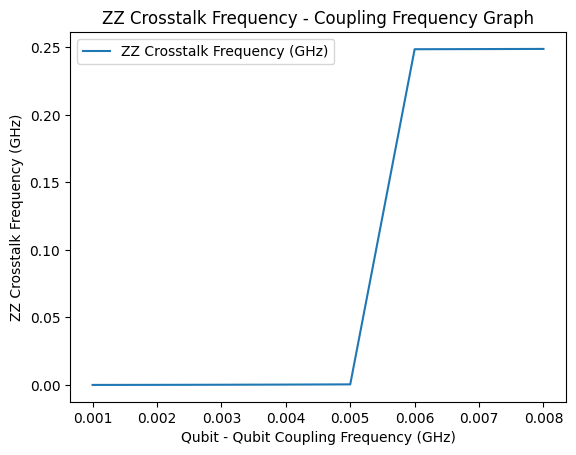

In [ ]:
plt.plot(coupling_list, zz_frequency_list, label="ZZ Crosstalk Frequency (GHz)")
plt.legend()
plt.xlabel("Qubit - Qubit Coupling Frequency (GHz)")
plt.ylabel("ZZ Crosstalk Frequency (GHz)")
plt.title("ZZ Crosstalk Frequency - Coupling Frequency Graph")

Text(0.5, 1.0, 'ZZ Crosstalk Frequency - Coupling Frequency Graph')

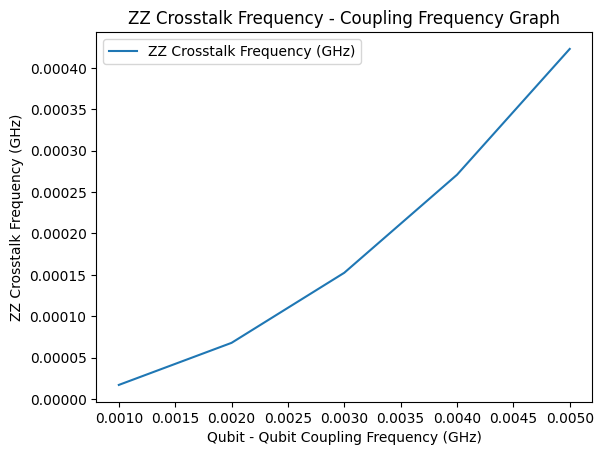

In [ ]:
plt.plot(coupling_list[0:5], zz_frequency_list[0:5], label="ZZ Crosstalk Frequency (GHz)")
plt.legend()
plt.xlabel("Qubit - Qubit Coupling Frequency (GHz)")
plt.ylabel("ZZ Crosstalk Frequency (GHz)")
plt.title("ZZ Crosstalk Frequency - Coupling Frequency Graph")

In [ ]:
infidelity_list = []

for i in range(5):
  theta = np.pi*500*zz_frequency_list[i]
  infidelity = 1-np.cos(theta)
  infidelity_list.append(100*infidelity)

infidelity_list

[0.03544499742796914,
 0.5663161231417746,
 2.8534673385800735,
 8.914667753603723,
 21.26123729752666]

Text(0.5, 1.0, 'CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 0,1,2,3,4 Qubit, shot 10000)')

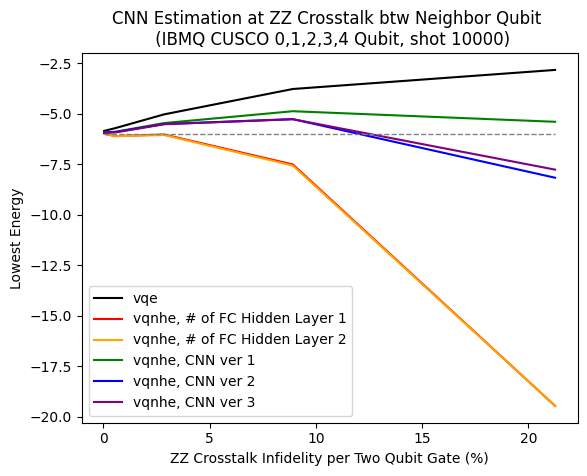

In [ ]:
infidelity_list = [0.035, 0.566, 2.853, 8.914, 21.261]

vqe = [-5.8452, -5.705799, -5.027199, -3.770399, -2.825800]
vqnheFC1 = [-5.984666, -6.103091, -6.023337, -7.507644, -19.463727]
vqnheFC2 = [-5.987575, -6.105551, -6.049816, -7.561412, -19.463726]
vqnheCNN1 = [-5.926552, -5.889523, -5.457238, -4.870896, -5.393885]
vqnheCNN2 = [-5.928321, -5.898607, -5.504990, -5.262938, -8.164898]
vqnheCNN3 = [-5.934305, -5.921773, -5.517617, -5.266391, -7.763526]

plt.plot(infidelity_list, vqe, label="vqe", color="black")
plt.plot(infidelity_list, vqnheFC1, label="vqnhe, # of FC Hidden Layer 1", color="red")
plt.plot(infidelity_list, vqnheFC2, label="vqnhe, # of FC Hidden Layer 2", color="orange")
plt.plot(infidelity_list, vqnheCNN1, label="vqnhe, CNN ver 1", color="green")
plt.plot(infidelity_list, vqnheCNN2, label="vqnhe, CNN ver 2", color="blue")
plt.plot(infidelity_list, vqnheCNN3, label="vqnhe, CNN ver 3", color="purple")

plt.hlines(-6.02, 0.035, 21.261,  color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("ZZ Crosstalk Infidelity per Two Qubit Gate (%)")
plt.ylabel("Lowest Energy")
plt.title("CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 0,1,2,3,4 Qubit, shot 10000)")

Text(0.5, 1.0, 'CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 0,1,2,3,4 Qubit, shot 10000)')

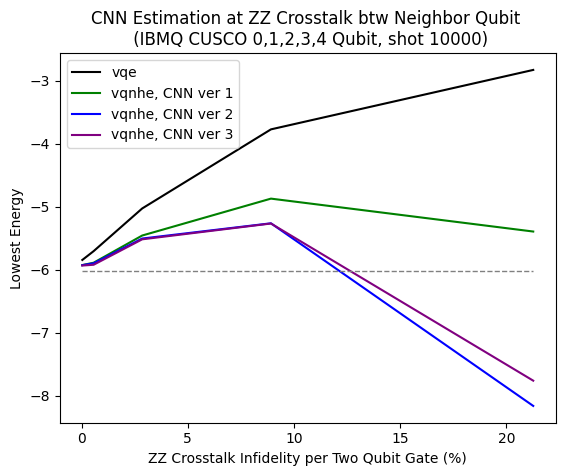

In [ ]:
plt.plot(infidelity_list, vqe, label="vqe", color="black")
plt.plot(infidelity_list, vqnheCNN1, label="vqnhe, CNN ver 1", color="green")
plt.plot(infidelity_list, vqnheCNN2, label="vqnhe, CNN ver 2", color="blue")
plt.plot(infidelity_list, vqnheCNN3, label="vqnhe, CNN ver 3", color="purple")
plt.hlines(-6.02, 0.035, 21.261,  color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("ZZ Crosstalk Infidelity per Two Qubit Gate (%)")
plt.ylabel("Lowest Energy")
plt.title("CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 0,1,2,3,4 Qubit, shot 10000)")

Text(0.5, 1.0, 'CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 0,1,2,3,4 Qubit, shot 10000)')

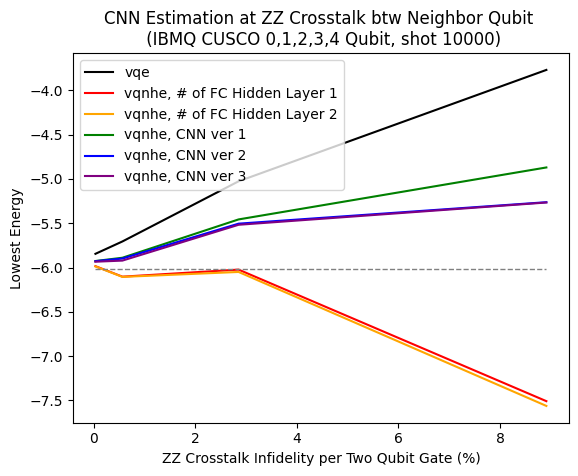

In [ ]:
plt.plot(infidelity_list[0:4], vqe[0:4], label="vqe", color="black")
plt.plot(infidelity_list[0:4], vqnheFC1[0:4], label="vqnhe, # of FC Hidden Layer 1", color="red")
plt.plot(infidelity_list[0:4], vqnheFC2[0:4], label="vqnhe, # of FC Hidden Layer 2", color="orange")
plt.plot(infidelity_list[0:4], vqnheCNN1[0:4], label="vqnhe, CNN ver 1", color="green")
plt.plot(infidelity_list[0:4], vqnheCNN2[0:4], label="vqnhe, CNN ver 2", color="blue")
plt.plot(infidelity_list[0:4], vqnheCNN3[0:4], label="vqnhe, CNN ver 3", color="purple")

plt.hlines(-6.02, 0.035, 8.914,  color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("ZZ Crosstalk Infidelity per Two Qubit Gate (%)")
plt.ylabel("Lowest Energy")
plt.title("CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 0,1,2,3,4 Qubit, shot 10000)")

Text(0.5, 1.0, 'CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 0,1,2,3,4 Qubit, shot 10000)')

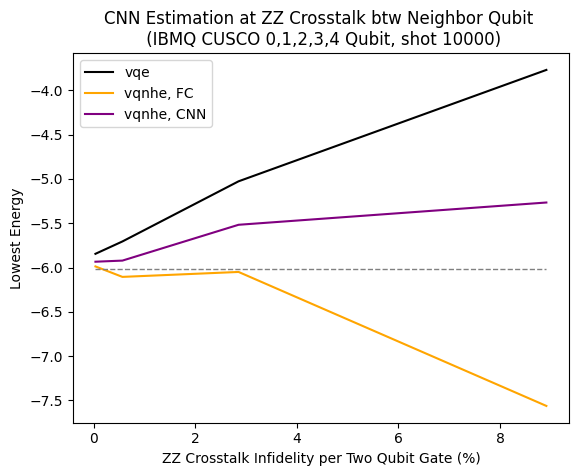

In [ ]:
plt.plot(infidelity_list[0:4], vqe[0:4], label="vqe", color="black")
plt.plot(infidelity_list[0:4], vqnheFC2[0:4], label="vqnhe, FC", color="orange")
plt.plot(infidelity_list[0:4], vqnheCNN3[0:4], label="vqnhe, CNN", color="purple")

plt.hlines(-6.02, 0.035, 8.914,  color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.xlabel("ZZ Crosstalk Infidelity per Two Qubit Gate (%)")
plt.ylabel("Lowest Energy")
plt.title("CNN Estimation at ZZ Crosstalk btw Neighbor Qubit \n (IBMQ CUSCO 0,1,2,3,4 Qubit, shot 10000)")